In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [99]:
files = os.listdir()
labels=[]
ids = []
for file in files:
    if "txt" in file:
        count=0
        with open(file,'r') as f:
            lines = f.readlines()
            for line in lines:
                try:
                    building_id = line.strip().split(",")[0]
                    

                    label = int(line.strip().split(",")[1])
                    ids.append(building_id)
                    labels.append(label)
                    count+=1
                except:
                    continue
            print(f"File {file} is opened with {count} labelled roofs inside")

File Denhaag_roof_left.txt is opened with 627 labelled roofs inside
File denhaag_roof_tb2_1029.txt is opened with 551 labelled roofs inside
File Rotterdam_roof.txt is opened with 1373 labelled roofs inside


In [100]:
df = None
count=0
for file in files:
    if "csv" in file:
        if count==0:
            df=pd.read_csv(file)
            count+=1
        else:
            df = pd.concat([df,pd.read_csv(file) ], axis=0, ignore_index=True)
            count+=1
df = df.drop(axis=1,columns=df.columns[0])

In [101]:
df.columns

Index(['Area', 'MaxAngle', 'MinAngle', 'Num_polygon', 'MaxAreaPropotion',
       'LargestPolygonAngle', 'NumberofHorzontial',
       'intersection_angle_max_min', 'largest_polygon_area',
       'second_largest_polygon_area', 'second_largest_degree',
       'ground_degree_avg', 'ground_degree_std', 'ground_degree_median',
       'Min_Area_Proportion', 'Absolute_Max_Height (roof to ground)',
       'Relative_Max_Height (Maximum roof height - minimum)',
       'Roof_height_standard_deviation', 'Roof_height_median',
       'The number of small roof parts',
       'The area proportion of small roof parts', 'the squareness_avg',
       'the squareness_med', 'the squareness_std', 'Id', 'geometry'],
      dtype='object')

In [102]:
df.head()


,Area,MaxAngle,MinAngle,Num_polygon,MaxAreaPropotion,LargestPolygonAngle,NumberofHorzontial,intersection_angle_max_min,largest_polygon_area,second_largest_polygon_area,...,Relative_Max_Height (Maximum roof height - minimum),Roof_height_standard_deviation,Roof_height_median,The number of small roof parts,The area proportion of small roof parts,the squareness_avg,the squareness_med,the squareness_std,Id,geometry
0,166.190179,179.63,179.63,1.0,100.000000,179.63,1,0.000000,166.190179,0.000000,...,0.000000,0.000000,10.765946,0,0.000000,1.469135,1.469135,0.000000,NaN,NaN
1,166.190179,179.63,179.63,1.0,100.000000,179.63,1,0.000000,166.190179,0.000000,...,0.000000,0.000000,10.765946,0,0.000000,1.469135,1.469135,0.000000,NaN,NaN
2,11.861052,178.81,178.81,1.0,100.000000,178.81,1,0.000000,11.861052,0.000000,...,0.000000,0.000000,7.655901,0,0.000000,1.422253,1.422253,0.000000,NaN,NaN
3,11.861052,178.81,178.81,1.0,100.000000,178.81,1,0.000000,11.861052,0.000000,...,0.000000,0.000000,7.655901,0,0.000000,1.422253,1.422253,0.000000,NaN,NaN
4,122.576941,179.55,114.81,5.0,66.822179,179.55,4,53.992469,81.908583,17.740611,...,2.962667,0.999558,9.492956,1,0.040425,1.661516,1.619207,0.392296,NaN,NaN


In [103]:
data_label = pd.DataFrame({'building_id':ids,"labels":labels})
data_label = data_label.loc[(data_label['labels'] != 0) & (data_label['labels'] != -1) &(data_label['labels']<=15) ]
data_label.head()

,building_id,labels
0,NL.IMBAG.Pand.0518100000203155-0_0,1
1,NL.IMBAG.Pand.0518100000203155-0_1,1
2,NL.IMBAG.Pand.0518100000203166-0_0,5
3,NL.IMBAG.Pand.0518100000203170-0_0,1
4,NL.IMBAG.Pand.0518100000203173-0_0,5


In [104]:
data=pd.merge(data_label,df,left_on="building_id",right_on="Id")
data.head()

,building_id,labels,Area,MaxAngle,MinAngle,Num_polygon,MaxAreaPropotion,LargestPolygonAngle,NumberofHorzontial,intersection_angle_max_min,...,Relative_Max_Height (Maximum roof height - minimum),Roof_height_standard_deviation,Roof_height_median,The number of small roof parts,The area proportion of small roof parts,the squareness_avg,the squareness_med,the squareness_std,Id,geometry
0,NL.IMBAG.Pand.0518100000203155-0_0,1,166.190179,179.63,179.63,1.0,100.0,179.63,1,0.0,...,0.0,0.0,10.765946,0,0.0,1.469135,1.469135,0.0,NL.IMBAG.Pand.0518100000203155-0_0,MULTIPOLYGON Z (((81129.31837499999 453482.053...
1,NL.IMBAG.Pand.0518100000203155-0_0,1,166.190179,179.63,179.63,1.0,100.0,179.63,1,0.0,...,0.0,0.0,10.765946,0,0.0,1.469135,1.469135,0.0,NL.IMBAG.Pand.0518100000203155-0_0,MULTIPOLYGON Z (((81129.31837499999 453482.053...
2,NL.IMBAG.Pand.0518100000203155-0_0,1,166.190179,179.63,179.63,1.0,100.0,179.63,1,0.0,...,0.0,0.0,10.765946,0,0.0,1.469135,1.469135,0.0,NL.IMBAG.Pand.0518100000203155-0_0,MULTIPOLYGON Z (((81129.31837499999 453482.053...
3,NL.IMBAG.Pand.0518100000203155-0_1,1,11.861052,178.81,178.81,1.0,100.0,178.81,1,0.0,...,0.0,0.0,7.655901,0,0.0,1.422253,1.422253,0.0,NL.IMBAG.Pand.0518100000203155-0_1,MULTIPOLYGON Z (((81132.365375 453487.28375 7....
4,NL.IMBAG.Pand.0518100000203155-0_1,1,11.861052,178.81,178.81,1.0,100.0,178.81,1,0.0,...,0.0,0.0,7.655901,0,0.0,1.422253,1.422253,0.0,NL.IMBAG.Pand.0518100000203155-0_1,MULTIPOLYGON Z (((81132.365375 453487.28375 7....


In [105]:
np.unique(data["labels"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [106]:
np.sum(data["labels"]==6)

65

2174


DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.


<Axes: >

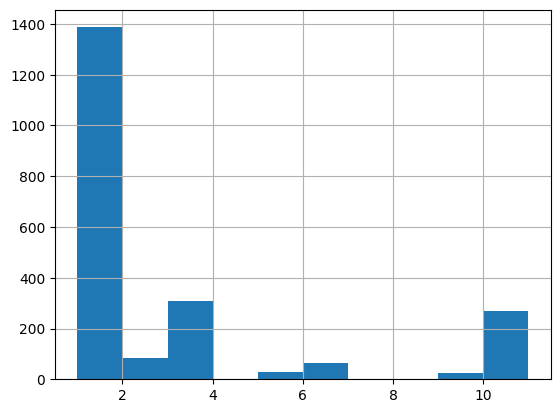

In [107]:
print(len(data))
# only on munich
data = data.interpolate(method="linear")
data["labels"].hist()


1: 1387
2: 82
3: 310
4: 1
5: 30
6: 65
7: 2
8: 1
9: 26
10: 3
11: 267
There are 2174 labelled in total


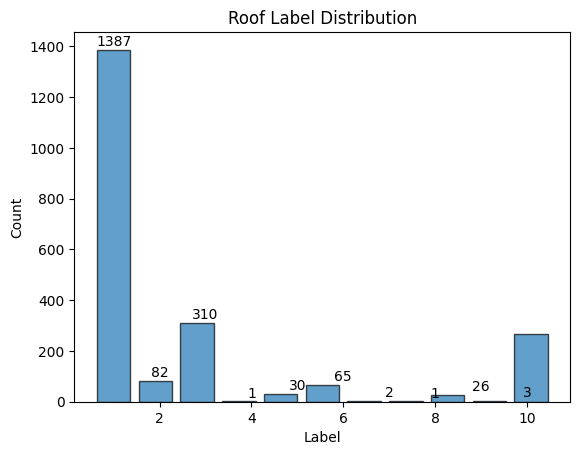

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have created the 'data_label' DataFrame as mentioned in your code and have merged it with 'df' into the 'data' DataFrame

# Filter the 'data' DataFrame to exclude labels that are 0, -1, or greater than 15
filtered_data = data.loc[(data['labels'] != 0) & (data['labels'] != -1) & (data['labels'] <= 15)]

# Plot a histogram of the 'labels' column
plt.figure()
# hist = filtered_data['labels'].hist(bins=15, rwidth=1.16, align='mid', alpha=0.7, edgecolor='black')
plt.hist(filtered_data['labels'],bins=11, range=(1,11),rwidth=0.8, align='left', alpha=0.7, edgecolor='black')
plt.title('Roof Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Count the number of rows for each label and annotate the bars with row numbers
label_counts = filtered_data['labels'].value_counts().sort_index()
num_all=0
for label, count in label_counts.items():
    print(f"{label}: {count}")
    num_all+=count
    plt.annotate(f"{count}", (label, count), textcoords="offset points", xytext=(0, 3), ha='center')
print(f"There are {num_all} labelled in total")
# Show the histogram
plt.show()


In [109]:
data =data[(data["labels"]!=4) & (data["labels"]!=7) & (data["labels"]!=8) & (data["labels"]!=10)]
values = data["labels"].values
for index,label in enumerate(data["labels"].values):
    if label>4 and label < 7:
        label = label-1
    elif label<10 and label>8:
        label = label-3
    elif label>10:
        label = label-4
    values[index] = label
data["labels"] = values
    

In [110]:
# data =data[(data["labels"]!=4) & (data["labels"]!=5) &(data["labels"]!=7)& (data["labels"]!=8) & (data["labels"]!=10)]
# values = data["labels"].values
# for index,label in enumerate(data["labels"].values):
#     if label>5and label < 7:
#         label = label-2
#     elif label<10 and label>8:
#         label = label-4
#     elif label>10:
#         label = label-5
#     values[index] = label
# data["labels"] = values
    

columns = list(data.columns)# without data argumentation

In [111]:
columns = list(data.columns)
columns

['building_id',
 'labels',
 'Area',
 'MaxAngle',
 'MinAngle',
 'Num_polygon',
 'MaxAreaPropotion',
 'LargestPolygonAngle',
 'NumberofHorzontial',
 'intersection_angle_max_min',
 'largest_polygon_area',
 'second_largest_polygon_area',
 'second_largest_degree',
 'ground_degree_avg',
 'ground_degree_std',
 'ground_degree_median',
 'Min_Area_Proportion',
 'Absolute_Max_Height (roof to ground)',
 'Relative_Max_Height (Maximum roof height - minimum)',
 'Roof_height_standard_deviation',
 'Roof_height_median',
 'The number of small roof parts',
 'The area proportion of small roof parts',
 'the squareness_avg',
 'the squareness_med',
 'the squareness_std',
 'Id',
 'geometry']

In [112]:
columns = list(data.columns)
for col in ["Id","building_id",
            "geometry","labels"]:
    columns.remove(col)
x_check=data[columns]
columns_with_nan = x_check.columns[x_check.isna().any()].tolist()

# 'columns_with_nan' now contains the names of columns with NaN values

# If you want to print the column names with NaN values:
for column in columns_with_nan:
    print(f"Column '{column}' contains NaN values.")

In [113]:
df.fillna('', inplace=True)

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [114]:
x_df = data[columns]
print(list(x_df.columns))
x_df.to_csv("check.csv")

['Area', 'MaxAngle', 'MinAngle', 'Num_polygon', 'MaxAreaPropotion', 'LargestPolygonAngle', 'NumberofHorzontial', 'intersection_angle_max_min', 'largest_polygon_area', 'second_largest_polygon_area', 'second_largest_degree', 'ground_degree_avg', 'ground_degree_std', 'ground_degree_median', 'Min_Area_Proportion', 'Absolute_Max_Height (roof to ground)', 'Relative_Max_Height (Maximum roof height - minimum)', 'Roof_height_standard_deviation', 'Roof_height_median', 'The number of small roof parts', 'The area proportion of small roof parts', 'the squareness_avg', 'the squareness_med', 'the squareness_std']


In [115]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = data["labels"].values.reshape(-1,1)
y= y.reshape(-1,1)
x = data[columns].values
scaler = StandardScaler()
# Fit the scaler to your data and transform it
X = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
np.unique(y_train),np.unique(y_test)

oversampler = RandomOverSampler()
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)




              precision    recall  f1-score   support

           1       0.84      0.66      0.74       588
           2       0.67      0.91      0.77       342
           3       0.60      0.52      0.56       546
           4       0.57      0.47      0.51       572
           5       0.58      0.53      0.55       503
           6       0.39      0.60      0.47       301
           7       0.25      0.28      0.27       417

    accuracy                           0.56      3269
   macro avg       0.56      0.57      0.55      3269
weighted avg       0.58      0.56      0.56      3269



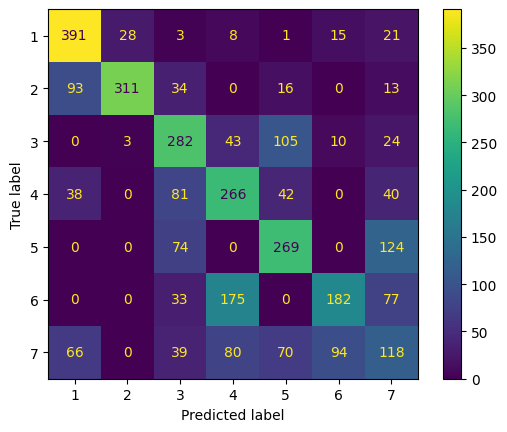

In [116]:
from sklearn import svm
clf = svm.NuSVC()
clf.fit(X_train, y_train)
from sklearn.metrics import classification_report
pred_y = clf.predict(X_test)

report = classification_report(pred_y,y_test)
print(report)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           1       0.94      0.45      0.61       964
           2       0.58      0.93      0.72       295
           3       0.88      0.49      0.63       831
           4       0.00      0.00      0.00        14
           5       0.49      0.97      0.65       238
           6       0.07      0.61      0.13        54
           7       0.64      0.34      0.45       873

    accuracy                           0.51      3269
   macro avg       0.51      0.54      0.45      3269
weighted avg       0.76      0.51      0.57      3269



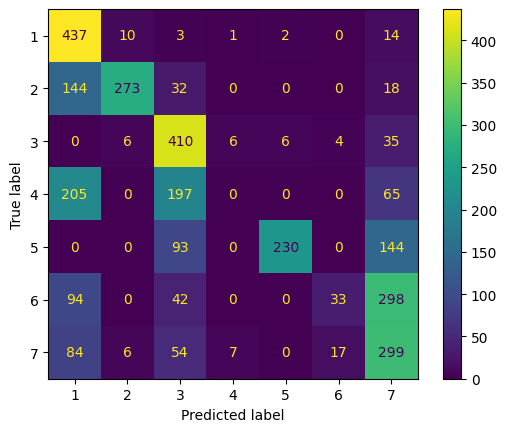

In [117]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

![image.png](attachment:b1906c6b-1c5e-4c54-837a-567167a736d7.png)

In [118]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)


In [119]:
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=np.array(columns)[sorted_importances_idx],
)

importances.head(15)

,the squareness_med,the squareness_avg,Relative_Max_Height (Maximum roof height - minimum),Roof_height_standard_deviation,Area,ground_degree_avg,intersection_angle_max_min,Absolute_Max_Height (roof to ground),Roof_height_median,The area proportion of small roof parts,...,ground_degree_std,The number of small roof parts,the squareness_std,Num_polygon,MaxAngle,MinAngle,second_largest_polygon_area,Min_Area_Proportion,LargestPolygonAngle,MaxAreaPropotion
0,-0.021719,-0.023861,-0.014377,-0.009789,-0.016213,-0.011930,-0.007648,-0.011318,-0.010095,-0.008565,...,0.000306,-0.000918,0.003977,0.000306,0.009483,0.006730,0.023249,0.025696,0.060875,0.089324
1,-0.024472,-0.024472,-0.016519,-0.014072,-0.013766,-0.013460,-0.007342,-0.008871,-0.007648,-0.012542,...,-0.006118,-0.000612,0.000612,0.002141,0.005506,0.013460,0.010401,0.025084,0.053839,0.089018
2,-0.021719,-0.021107,-0.014989,-0.011013,-0.014377,-0.012236,-0.010095,-0.008871,-0.011624,-0.007036,...,-0.003977,-0.000918,0.002753,0.005812,0.002141,0.008259,0.026308,0.031814,0.065158,0.089936
3,-0.022331,-0.021719,-0.015907,-0.017131,-0.010707,-0.013154,-0.011318,-0.007648,-0.009483,-0.009483,...,-0.002141,-0.001224,-0.003365,0.006424,0.009483,0.008565,0.025696,0.027531,0.059651,0.090853
4,-0.022943,-0.022637,-0.018966,-0.018048,-0.017742,-0.009789,-0.008565,-0.009483,-0.007342,-0.010401,...,-0.006118,-0.000306,-0.002753,0.002753,0.003365,0.014683,0.023555,0.027837,0.055675,0.089324
5,-0.021107,-0.021719,-0.014377,-0.014683,-0.010707,-0.011318,-0.010401,-0.010707,-0.009483,-0.009483,...,0.000000,-0.001224,0.000612,0.002141,0.007648,0.010707,0.016213,0.027837,0.058122,0.085653
6,-0.021719,-0.019578,-0.015907,-0.015295,-0.010095,-0.011013,-0.012848,-0.013154,-0.011013,-0.011318,...,-0.004894,-0.001530,-0.004589,0.001224,0.002753,0.017437,0.018354,0.025084,0.055980,0.091465
7,-0.023555,-0.023555,-0.015601,-0.013460,-0.012542,-0.016519,-0.014072,-0.010095,-0.009789,-0.008565,...,-0.002447,-0.001530,-0.003977,0.002753,0.003671,0.008565,0.021719,0.032120,0.055675,0.096666
8,-0.022331,-0.019578,-0.017742,-0.012848,-0.014377,-0.010401,-0.009789,-0.008871,-0.011624,-0.007342,...,-0.003365,-0.000918,0.000612,0.006118,0.008871,0.009177,0.020496,0.029367,0.058734,0.100948
9,-0.020496,-0.021719,-0.016519,-0.009789,-0.010707,-0.012542,-0.011318,-0.012236,-0.010095,-0.007036,...,-0.001530,-0.001224,-0.001530,0.001530,0.007954,0.010707,0.014683,0.031814,0.053227,0.092077


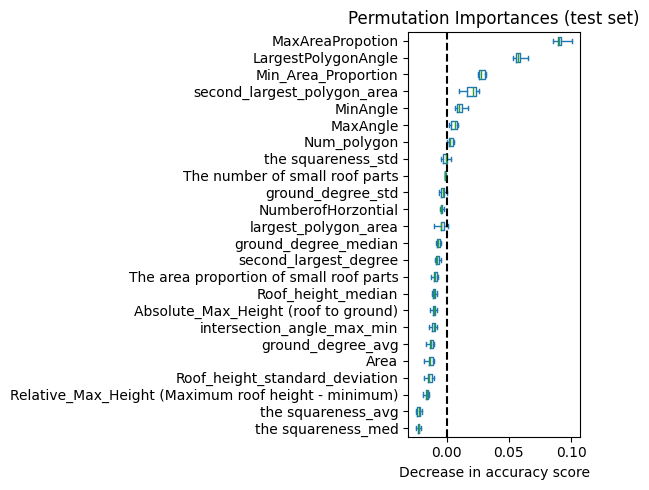

In [120]:
ax = importances.plot.box(vert=False, whis=50,figsize=(6,5))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

# dimensionality reduction

In [121]:
filter_columns = np.array(columns)[result.importances_mean>0]
filter_columns

array(['MaxAngle', 'MinAngle', 'Num_polygon', 'MaxAreaPropotion',
       'LargestPolygonAngle', 'second_largest_polygon_area',
       'Min_Area_Proportion'], dtype='<U51')

In [122]:
data=pd.merge(data_label,df,left_on="building_id",right_on="Id")
data.head()


,building_id,labels,Area,MaxAngle,MinAngle,Num_polygon,MaxAreaPropotion,LargestPolygonAngle,NumberofHorzontial,intersection_angle_max_min,...,Relative_Max_Height (Maximum roof height - minimum),Roof_height_standard_deviation,Roof_height_median,The number of small roof parts,The area proportion of small roof parts,the squareness_avg,the squareness_med,the squareness_std,Id,geometry
0,NL.IMBAG.Pand.0518100000203155-0_0,1,166.190179,179.63,179.63,1.0,100.0,179.63,1,0.0,...,0.0,0.0,10.765946,0,0.0,1.469135,1.469135,0.0,NL.IMBAG.Pand.0518100000203155-0_0,MULTIPOLYGON Z (((81129.31837499999 453482.053...
1,NL.IMBAG.Pand.0518100000203155-0_0,1,166.190179,179.63,179.63,1.0,100.0,179.63,1,0.0,...,0.0,0.0,10.765946,0,0.0,1.469135,1.469135,0.0,NL.IMBAG.Pand.0518100000203155-0_0,MULTIPOLYGON Z (((81129.31837499999 453482.053...
2,NL.IMBAG.Pand.0518100000203155-0_0,1,166.190179,179.63,179.63,1.0,100.0,179.63,1,0.0,...,0.0,0.0,10.765946,0,0.0,1.469135,1.469135,0.0,NL.IMBAG.Pand.0518100000203155-0_0,MULTIPOLYGON Z (((81129.31837499999 453482.053...
3,NL.IMBAG.Pand.0518100000203155-0_1,1,11.861052,178.81,178.81,1.0,100.0,178.81,1,0.0,...,0.0,0.0,7.655901,0,0.0,1.422253,1.422253,0.0,NL.IMBAG.Pand.0518100000203155-0_1,MULTIPOLYGON Z (((81132.365375 453487.28375 7....
4,NL.IMBAG.Pand.0518100000203155-0_1,1,11.861052,178.81,178.81,1.0,100.0,178.81,1,0.0,...,0.0,0.0,7.655901,0,0.0,1.422253,1.422253,0.0,NL.IMBAG.Pand.0518100000203155-0_1,MULTIPOLYGON Z (((81132.365375 453487.28375 7....


DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.


<Axes: >

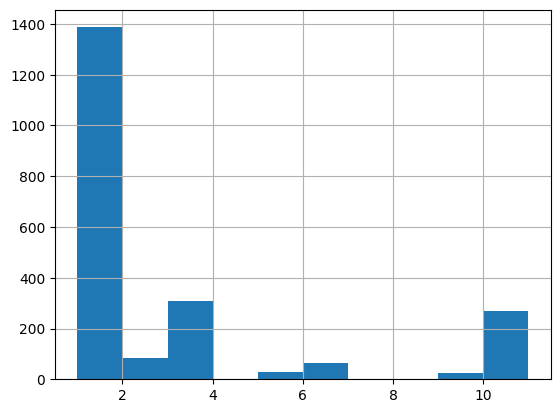

In [123]:

data = data.interpolate(method="linear")
data["labels"].hist()


In [124]:
data =data[(data["labels"]!=4) & (data["labels"]!=7) & (data["labels"]!=8) & (data["labels"]!=10)]
values = data["labels"].values
for index,label in enumerate(data["labels"].values):
    if label>4 and label < 7:
        label = label-1
    elif label<10 and label>8:
        label = label-3
    elif label>10:
        label = label-4
    values[index] = label
data["labels"] = values
    

In [125]:
# data =data[(data["labels"]!=4) & (data["labels"]!=5) &(data["labels"]!=7)& (data["labels"]!=8) & (data["labels"]!=10)]
# values = data["labels"].values
# for index,label in enumerate(data["labels"].values):
#     if label>5and label < 7:
#         label = label-2
#     elif label<10 and label>8:
#         label = label-4
#     elif label>10:
#         label = label-5
#     values[index] = label
# data["labels"] = values
    

In [126]:
np.unique(data["labels"])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [127]:
y = data["labels"].values.reshape(-1,1)
y= y.reshape(-1,1)
x = data[filter_columns].values
scaler = StandardScaler()
# Fit the scaler to your data and transform it
X = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
np.unique(y_train),np.unique(y_test)

oversampler = RandomOverSampler()
X_train, y_train = oversampler.fit_resample(X_train, y_train)
X_test, y_test = oversampler.fit_resample(X_test, y_test)




              precision    recall  f1-score   support

           1       0.88      0.46      0.61       890
           2       0.61      0.86      0.71       331
           3       0.85      0.47      0.60       843
           4       0.00      0.00      0.00        17
           5       0.39      0.87      0.54       210
           6       0.08      0.83      0.15        46
           7       0.71      0.36      0.48       932

    accuracy                           0.50      3269
   macro avg       0.50      0.55      0.44      3269
weighted avg       0.75      0.50      0.57      3269



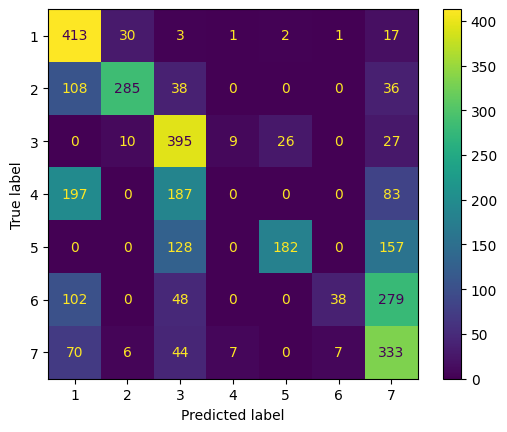

In [128]:
clf = HistGradientBoostingClassifier()
y_train=y_train.ravel()
y_test=y_test.ravel()
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
report = classification_report(pred_y,y_test)
print(report)
# normalize it to 0-1
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

1: 1387
2: 82
3: 310
4: 30
5: 65
6: 26
7: 267
There are 2167 labelled in total


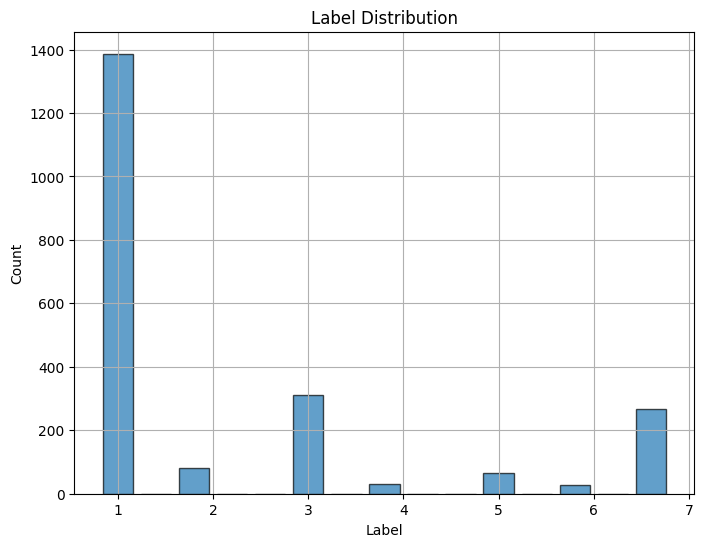

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have created the 'data_label' DataFrame as mentioned in your code and have merged it with 'df' into the 'data' DataFrame

# Filter the 'data' DataFrame to exclude labels that are 0, -1, or greater than 15
filtered_data = data.loc[(data['labels'] != 0) & (data['labels'] != -1) & (data['labels'] <= 15)]

# Plot a histogram of the 'labels' column
plt.figure(figsize=(8, 6))
hist = filtered_data['labels'].hist(bins=15, rwidth=0.8, align='left', alpha=0.7, edgecolor='black')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')

# Count the number of rows for each label and annotate the bars with row numbers
label_counts = filtered_data['labels'].value_counts().sort_index()
num_all=0
for label, count in label_counts.items():
    print(f"{label}: {count}")
    num_all+=count
#     plt.annotate(f"{count}", (label, count), textcoords="offset points", xytext=(0, 10), ha='center')
print(f"There are {num_all} labelled in total")
# Show the histogram
plt.show()


In [130]:
data["pred_data"] = clf.predict(data[filter_columns].values)

In [131]:
matrix_labels = {int(j):{int(i):[] for i in np.unique(data["labels"])} for j in np.unique(data["labels"]) }
for index,row in data.iterrows():
    ids = row["Id"]
    label = row["labels"]   
    pred = row["pred_data"]
    matrix_labels[label][pred].append(ids)
    
    

In [132]:
import json
json_file_path = "data.json"

# Dump the dictionary to a JSON file
with open(json_file_path, "w") as json_file:
    json.dump(matrix_labels, json_file, indent=4)  # indent parameter for pretty formatting (optional)

print(f"The dictionary has been dumped to {json_file_path}")

The dictionary has been dumped to data.json


In [53]:
!pip install mayavi
!pip install PyQt5

In [133]:
def plot(polygons):
        fig = plt.figure()
        ax1 = fig.add_subplot(121,projection='3d')

        polygons2 = deepcopy(polygons)
        
        individual_polygons = []
        for multi_polygon in polygons:
            if isinstance(multi_polygon, MultiPolygon):
                for polygon in multi_polygon:
                    individual_polygons.append(polygon)
            else:
                individual_polygons.append(multi_polygon)

        individual_polygons2 = []
        for multi_polygon in polygons2:
            if isinstance(multi_polygon, MultiPolygon):
                for polygon in multi_polygon:
                    individual_polygons2.append(polygon)
            else:
                individual_polygons2.append(multi_polygon)
        individual_surrounding_polygons = []

        for polygon in individual_polygons:
            ax1.add_collection3d(polygon)

   
        widths = max(abs(minx-maxx),abs(miny-maxy))
        ax1.set_xlim(minx, minx+widths)
        ax1.set_ylim(miny, miny+widths)

        ax1.set_zlim(minz, minz+widths)


        plt.show()

In [134]:
def return_polygons(group_multi,colors = 'red'):
        maxx, minx, maxy, miny, maxz, minz = (0, 10**9, 0, 10**9, 0, 10**9)
        group = []
        for multi_polygon in group_multi:
            print(multi_polygon)
            if isinstance(multi_polygon, MultiPolygon):
                group.extend(list(multi_polygon.geoms))
            else:
                # Handle individual Polygons if they are not part of a MultiPolygon
                group.append(multi_polygon)
        polygons = []
        for geom in group:
            x, y, z = zip(*geom.exterior.coords)

            if min(x) < minx:
                minx = min(x)
            if min(y) < miny:
                miny = min(y)
            if min(z) < minz:
                minz = min(z)
            if max(x) > maxx:
                maxx = max(x)
            if max(y) > maxy:
                maxy = max(y)
            if max(z) > maxz:
                maxz = max(z)
            coords = np.array(list(zip(x, y, z)))
            coords = [np.array(list(coord)) for coord in coords]

            polygon = Poly3DCollection([coords])
            polygon.set_color(colors)
            polygon.set_edgecolor('k')
            polygons.append(polygon)
        return polygons, maxx,minx,maxy,miny,maxz,minz

In [56]:
! pip install shapely==1.8.5

In [57]:
! pip install pandas


NL.IMBAG.Pand.0518100000203155-0_0
MULTIPOLYGON Z (((81129.31837499999 453482.05375 10.69750146484375, 81132.365375 453487.28375 10.692501464843751, 81123.556375 453490.68275000004 10.77350146484375, 81124.442375 453493.11375 10.77550146484375, 81114.888375 453496.58475000004 10.86250146484375, 81111.017375 453486.24175 10.855501464843748, 81120.52337499999 453482.64275 10.768501464843748, 81121.418375 453485.16275 10.77050146484375, 81129.31837499999 453482.05375 10.69750146484375)))
1


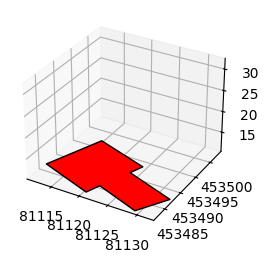

class 1, classified into class1
NL.IMBAG.Pand.0518100000204152-0_0
MULTIPOLYGON Z (((81209.912375 453580.52575000003 4.174501464843749, 81209.836375 453580.63575 4.16850146484375, 81208.612375 453582.83575 4.113501464843749, 81207.010375 453582.04275 3.66650146484375, 81208.85337499999 453578.35075000004 3.709501464843749, 81210.620375 453579.00775 4.180501464843749, 81210.73237499999 453579.06875000003 4.212501464843749, 81209.912375 453580.52575000003 4.174501464843749)))
1


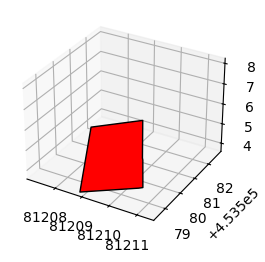

class 1, classified into class2
NL.IMBAG.Pand.0518100000203559-0_0
MULTIPOLYGON Z (((80844.272375 453169.27075 2.46750146484375, 80832.282375 453171.00075 3.426501464843749, 80833.426375 453170.61175000004 3.334501464843749, 80839.18537499999 453169.89975000004 2.873501464843748, 80838.19337499999 453160.47075000004 2.93150146484375, 80840.20937499999 453160.29475 2.770501464843749, 80841.36737499999 453169.62975 2.699501464843749, 80844.272375 453169.27075 2.46750146484375)))
1


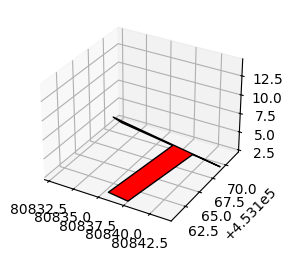

class 1, classified into class3
NL.IMBAG.Pand.0518100000204305-0_0
MULTIPOLYGON Z (((81849.202375 454495.56975 11.478501464843749, 81849.692375 454493.30375 10.669501464843748, 81851.24237499999 454493.63875000004 10.652501464843748, 81855.15937499999 454494.71475000004 10.68850146484375, 81854.34437499999 454497.62575 11.74350146484375, 81849.202375 454495.56975 11.478501464843749)), ((81854.34437499999 454497.62575 11.81050146484375, 81852.521375 454504.14575 11.20950146484375, 81851.56437499999 454503.86875 11.21750146484375, 81851.54637499999 454503.70175 11.231501464843749, 81851.17037499999 454503.18375 11.27050146484375, 81850.40637499999 454502.69475 11.29950146484375, 81849.50737499999 454502.57675 11.294501464843748, 81848.643375 454502.85275 11.254501464843749, 81848.582375 454503.13575 11.22950146484375, 81847.611375 454502.92675000004 11.230501464843748, 81849.202375 454495.56975 11.90050146484375, 81854.34437499999 454497.62575 11.81050146484375)))
2


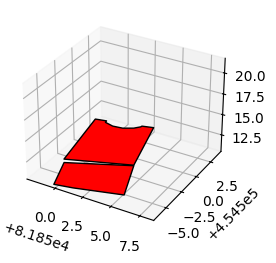

class 1, classified into class4
NL.IMBAG.Pand.0518100000204018-0_1
MULTIPOLYGON Z (((81959.45837499999 454493.79075000004 9.98250146484375, 81959.74237499999 454493.55475 9.96650146484375, 81959.93237499999 454490.07475 12.15950146484375, 81961.59837499999 454490.25375000003 11.03150146484375, 81962.089375 454490.59575000004 10.507501464843749, 81962.173375 454490.65475 10.417501464843749, 81962.36837499999 454490.62275000004 10.32050146484375, 81963.33337499999 454490.46775 9.83850146484375, 81963.609375 454490.80675 9.446501464843749, 81959.741375 454494.13075 9.584501464843749, 81959.45837499999 454493.79075000004 9.98250146484375)), ((81959.74237499999 454493.55475 9.96650146484375, 81959.45837499999 454493.79075000004 9.62750146484375, 81952.865375 454485.81475 9.699501464843749, 81954.78537499999 454484.34675 11.92150146484375, 81958.949375 454489.96975 11.52950146484375, 81959.62937499999 454490.04275 11.96550146484375, 81959.93237499999 454490.07475 12.15950146484375, 81959.742

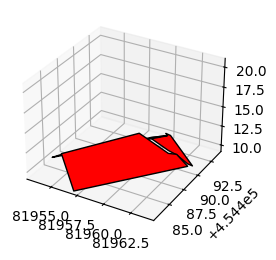

class 1, classified into class5
NL.IMBAG.Pand.0518100000209893-0_0
MULTIPOLYGON Z (((81649.83737499999 454436.73175000004 10.01150146484375, 81644.662375 454432.65675 10.05650146484375, 81645.26137499999 454431.65975 10.02750146484375, 81650.63737499999 454435.86675 9.98050146484375, 81649.942375 454436.59975 10.007501464843749, 81649.83737499999 454436.73175000004 10.01150146484375)), ((81645.25137499999 454426.55275000003 10.420501464843749, 81653.12537499999 454433.23975 10.46450146484375, 81650.63737499999 454435.86675 10.54650146484375, 81645.26137499999 454431.65975 10.523501464843749, 81644.662375 454432.65675 10.55050146484375, 81642.081375 454430.62375 10.539501464843749, 81645.25137499999 454426.55275000003 10.420501464843749)), ((81653.12537499999 454433.23975 10.363501464843749, 81645.25137499999 454426.55275000003 9.83950146484375, 81645.87937499999 454425.74675 7.83250146484375, 81653.452375 454431.95575 7.99950146484375, 81654.111375 454431.05175000004 5.80750146484375, 

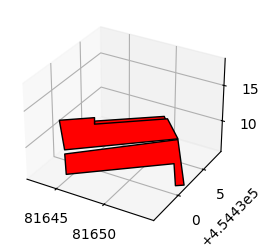

class 1, classified into class6
NL.IMBAG.Pand.0518100000205115-0_0
MULTIPOLYGON Z (((80598.649375 453770.09475 3.481501464843749, 80600.74337499999 453772.04775 3.504501464843749, 80600.09937499999 453773.29075000004 3.497501464843749, 80598.790375 453775.81875000003 3.482501464843748, 80596.153375 453774.28875 3.453501464843749, 80598.649375 453770.09475 3.481501464843749)), ((80599.703375 453768.32375000004 5.318501464843749, 80601.657375 453770.28375 4.52450146484375, 80600.74337499999 453772.04775 4.690501464843749, 80598.649375 453770.09475 5.529501464843749, 80599.703375 453768.32375000004 5.318501464843749)), ((80603.45837499999 453766.80675 3.535501464843749, 80601.657375 453770.28375 3.51550146484375, 80599.703375 453768.32375000004 3.493501464843749, 80601.487375 453765.32675 3.513501464843749, 80603.45837499999 453766.80675 3.535501464843749)), ((80601.487375 453765.32675 5.923501464843749, 80602.923375 453762.91375 6.251501464843749, 80610.01637499999 453767.06875000003 6.2

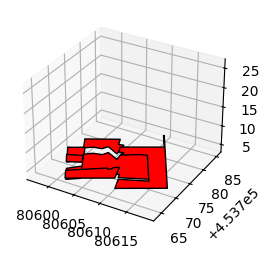

class 1, classified into class7
NL.IMBAG.Pand.0518100000204598-0_13
MULTIPOLYGON Z (((81916.407375 453267.73175000004 15.806501464843748, 81917.37637499999 453269.30075 15.84250146484375, 81911.703375 453274.76875 15.852501464843751, 81910.85337499999 453273.44675 15.82250146484375, 81911.95837499999 453272.28275 15.818501464843749, 81914.48837499999 453270.75275000004 15.827501464843749, 81916.407375 453267.73175000004 15.806501464843748)), ((81901.544375 453264.00475 15.78450146484375, 81902.89137499999 453262.70075 15.80750146484375, 81905.419375 453258.88475 15.86950146484375, 81906.225375 453259.47475 15.86350146484375, 81906.86737499999 453258.85275 15.87450146484375, 81907.90537499999 453259.30475 15.870501464843748, 81902.657375 453265.24875 15.76950146484375, 81901.544375 453264.00475 15.78450146484375)), ((81872.480375 453299.43075 18.53450146484375, 81901.39037499999 453266.68375 18.547501464843748, 81902.657375 453265.24875 18.54850146484375, 81907.90537499999 453259.30475 

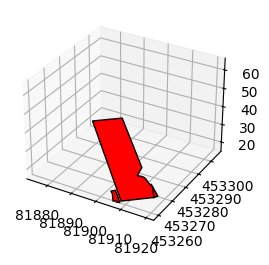

class 2, classified into class1
NL.IMBAG.Pand.0518100000204152-0_0
MULTIPOLYGON Z (((81209.912375 453580.52575000003 4.174501464843749, 81209.836375 453580.63575 4.16850146484375, 81208.612375 453582.83575 4.113501464843749, 81207.010375 453582.04275 3.66650146484375, 81208.85337499999 453578.35075000004 3.709501464843749, 81210.620375 453579.00775 4.180501464843749, 81210.73237499999 453579.06875000003 4.212501464843749, 81209.912375 453580.52575000003 4.174501464843749)))
1


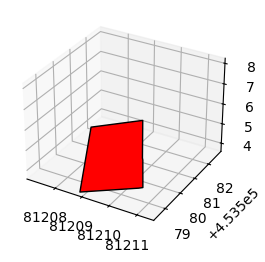

class 2, classified into class2
NL.IMBAG.Pand.0518100000205209-0_0
MULTIPOLYGON Z (((80679.289375 453589.54275 10.56050146484375, 80677.21337499999 453592.73375 6.312501464843749, 80672.98937499999 453589.95175 6.304501464843749, 80675.085375 453586.77275 10.552501464843749, 80679.289375 453589.54275 10.56050146484375)), ((80678.464375 453581.64875 3.744501464843749, 80682.635375 453584.39775 3.75250146484375, 80679.289375 453589.54275 10.56050146484375, 80675.085375 453586.77275 10.552501464843749, 80678.464375 453581.64875 3.744501464843749)))
2


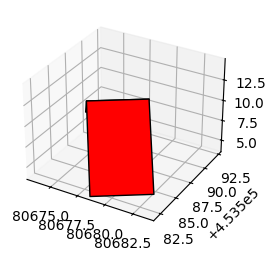

class 2, classified into class3
NL.IMBAG.Pand.0518100000209632-0_0
MULTIPOLYGON Z (((81641.365375 454655.97275 12.795501464843749, 81640.320375 454654.72575000004 12.61250146484375, 81641.503375 454653.41275 12.56050146484375, 81641.816375 454653.67475 12.605501464843748, 81641.654375 454653.86275000003 12.61350146484375, 81642.450375 454654.63875000004 12.736501464843748, 81641.365375 454655.97275 12.795501464843749)), ((81637.84937499999 454650.35575 13.260501464843749, 81641.503375 454653.41275 13.321501464843749, 81640.320375 454654.72575000004 16.08850146484375, 81638.95937499999 454653.09975 15.475501464843749, 81637.268375 454651.07875 14.713501464843748, 81637.84937499999 454650.35575 13.260501464843749)), ((81626.976375 454663.86675 15.033501464843749, 81629.359375 454665.52075 15.503501464843751, 81630.128375 454666.05375 15.655501464843748, 81630.61837499999 454666.58075 15.486501464843748, 81630.70837499999 454666.67775000003 15.45550146484375, 81630.18537499999 454667.5217

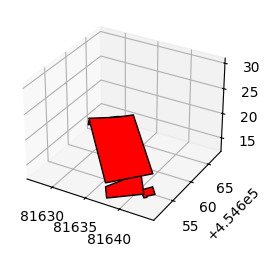

class 2, classified into class6
NL.IMBAG.Pand.0518100000205419-0_0
MULTIPOLYGON Z (((81993.00437499999 454690.28875 11.62150146484375, 81995.812375 454693.79075000004 11.61650146484375, 81991.05037499999 454699.08475000004 11.52250146484375, 81987.75737499999 454696.12275000004 11.51750146484375, 81993.00437499999 454690.28875 11.62150146484375)), ((81994.893375 454689.47575000004 8.853501464843749, 81994.62637499999 454689.58975000004 8.856501464843749, 81996.933375 454692.54375 8.843501464843749, 81995.812375 454693.79075000004 8.856501464843749, 81993.00437499999 454690.28875 8.872501464843749, 81994.165375 454688.99875 8.85950146484375, 81994.214375 454689.06275000004 8.85850146484375, 81994.893375 454689.47575000004 8.853501464843749)))
2


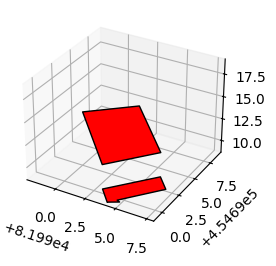

class 2, classified into class7
NL.IMBAG.Pand.0518100000208371-0_0
MULTIPOLYGON Z (((82192.271375 454766.99475 14.38350146484375, 82198.15237499999 454770.91375 14.425501464843748, 82196.91337499999 454772.68975 12.283501464843749, 82191.101375 454768.69975 12.33750146484375, 82192.271375 454766.99475 14.38350146484375)), ((82198.15237499999 454770.91375 14.667501464843749, 82192.271375 454766.99475 14.65050146484375, 82194.157375 454764.24775000004 11.117501464843748, 82200.149375 454768.36175000004 11.24150146484375, 82198.320375 454771.02575000003 14.66850146484375, 82198.15237499999 454770.91375 14.667501464843749)))
2


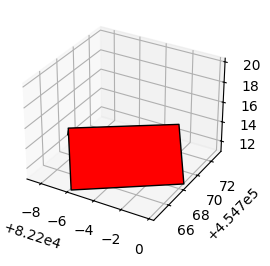

class 3, classified into class2
NL.IMBAG.Pand.0518100000203307-0_0
MULTIPOLYGON Z (((82334.24237499999 453147.45075 11.500501464843751, 82338.725375 453149.90575000003 6.881501464843749, 82333.070375 453160.00675 6.881501464843749, 82332.92537499999 453160.26575 6.881501464843749, 82328.49337499999 453157.68575 11.515501464843748, 82334.24237499999 453147.45075 11.500501464843751)), ((82329.645375 453144.93275000004 6.767501464843749, 82334.24237499999 453147.45075 11.500501464843751, 82328.49337499999 453157.68575 11.515501464843748, 82323.950375 453155.03975 6.76850146484375, 82324.100375 453154.78175 6.772501464843749, 82323.93537499999 453154.05675 6.321501464843749, 82324.895375 453152.33675 6.31350146484375, 82325.609375 453152.09975 6.770501464843749, 82326.547375 453150.45975000004 6.78150146484375, 82327.99337499999 453147.86575 6.76850146484375, 82327.825375 453147.12875000003 6.30950146484375, 82328.797375 453145.41775 6.315501464843749, 82329.50437499999 453145.18675 6.7695

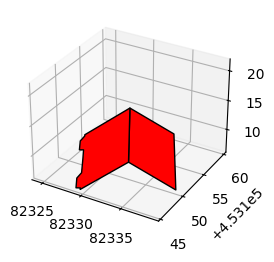

class 3, classified into class3
NL.IMBAG.Pand.0518100000204951-0_0
MULTIPOLYGON Z (((80661.19737499999 453607.98875 10.736501464843748, 80657.70537499999 453613.28775 3.673501464843749, 80653.47337499999 453610.49475 3.671501464843749, 80656.786375 453605.47275 10.366501464843749, 80659.08337499999 453606.78275 10.55950146484375, 80661.19737499999 453607.98875 10.736501464843748)), ((80663.14837499999 453605.02775 6.41550146484375, 80661.19737499999 453607.98875 10.38050146484375, 80659.08337499999 453606.78275 10.55950146484375, 80656.786375 453605.47275 10.75250146484375, 80658.919375 453602.23775000003 6.41850146484375, 80663.14837499999 453605.02775 6.41550146484375)))
2


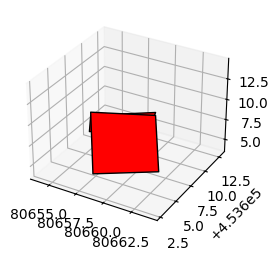

class 3, classified into class4
NL.IMBAG.Pand.0518100000205731-0_0
MULTIPOLYGON Z (((82114.25037499999 453043.36975 9.238501464843749, 82116.169375 453044.44775 8.74050146484375, 82114.23537499999 453047.88075 8.71950146484375, 82111.267375 453053.15275 8.68550146484375, 82109.441375 453052.10875 9.161501464843749, 82114.25037499999 453043.36975 9.238501464843749)), ((82112.29937499999 453042.27275 11.77050146484375, 82114.25037499999 453043.36975 9.55150146484375, 82109.441375 453052.10875 9.45450146484375, 82107.40637499999 453050.94475 11.780501464843748, 82112.29937499999 453042.27275 11.77050146484375)), ((82106.358375 453045.74175 8.863501464843749, 82105.207375 453048.93475 8.88650146484375, 82104.98237499999 453049.55875 8.89150146484375, 82103.34137499999 453048.62075 8.808501464843749, 82105.082375 453045.67075 8.81350146484375, 82106.358375 453045.74175 8.863501464843749)), ((82109.350375 453041.64375 8.892501464843749, 82108.53037499999 453043.17375 8.89350146484375, 82108.

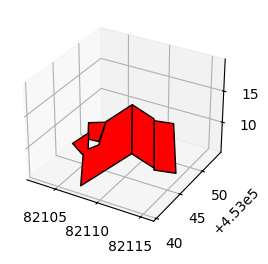

class 3, classified into class5
NL.IMBAG.Pand.0518100000203308-0_0
MULTIPOLYGON Z (((82319.85637499999 453134.26075 12.123501464843748, 82315.229375 453131.65675 7.33250146484375, 82320.130375 453122.92175000004 7.299501464843749, 82324.759375 453125.51975000004 12.09050146484375, 82319.85637499999 453134.26075 12.123501464843748)), ((82324.40637499999 453135.94575 9.23050146484375, 82322.642375 453135.57675 9.30050146484375, 82322.408375 453135.52775 9.31050146484375, 82327.377375 453126.98775000003 9.24650146484375, 82328.895375 453127.83975000004 9.17950146484375, 82324.40637499999 453135.94575 9.23050146484375)), ((82330.00737499999 453128.17375 6.695501464843749, 82325.05037499999 453137.18275000004 6.651501464843749, 82319.85637499999 453134.26075 12.123501464843748, 82324.759375 453125.51975000004 12.09050146484375, 82327.377375 453126.98775000003 9.33550146484375, 82322.408375 453135.52775 9.50950146484375, 82322.642375 453135.57675 9.30050146484375, 82324.40637499999 453135.94

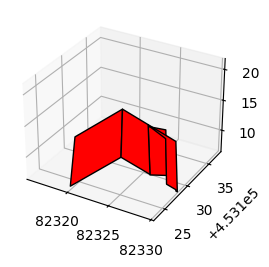

class 3, classified into class7
NL.IMBAG.Pand.0518100000206899-0_0
MULTIPOLYGON Z (((81855.870375 454293.69775 10.180501464843749, 81861.84937499999 454297.36775000003 9.593501464843749, 81857.918375 454303.38075 9.58550146484375, 81851.798375 454299.49175 10.19150146484375, 81855.870375 454293.69775 10.180501464843749)), ((81851.798375 454299.49175 9.82050146484375, 81848.559375 454297.43175 8.93150146484375, 81852.346375 454291.53175 8.92250146484375, 81855.870375 454293.69775 9.88050146484375, 81851.798375 454299.49175 9.82050146484375)))
2


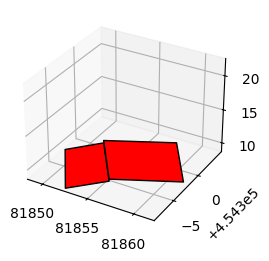

class 4, classified into class1
NL.IMBAG.Pand.0518100000206078-0_0
MULTIPOLYGON Z (((81766.695375 453999.48675000004 6.907501464843749, 81766.677375 453999.52475000004 6.908501464843749, 81764.40937499999 454004.08075 7.14950146484375, 81762.29537499999 454002.91375 5.003501464843749, 81764.774375 453998.42675000004 4.956501464843749, 81766.695375 453999.48675000004 6.907501464843749)), ((81766.695375 453999.48675000004 6.910501464843749, 81768.647375 454000.56275000004 4.975501464843749, 81766.17037499999 454005.05275000003 5.01250146484375, 81764.40937499999 454004.08075 6.75850146484375, 81766.677375 453999.52475000004 6.908501464843749, 81766.695375 453999.48675000004 6.910501464843749)))
2


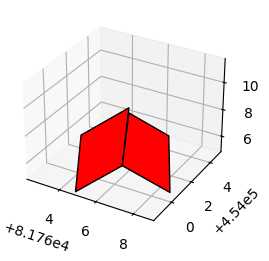

class 4, classified into class3
NL.IMBAG.Pand.0518100000203166-0_0
MULTIPOLYGON Z (((81004.44037499999 453443.39075 7.275501464843749, 81013.802375 453439.94775 7.266501464843749, 81014.06137499999 453440.61275000003 7.283501464843749, 81011.51637499999 453441.60875 7.28750146484375, 81011.86437499999 453442.67375 7.31350146484375, 81008.147375 453444.00775 7.31650146484375, 81007.861375 453443.03975 7.292501464843749, 81004.77337499999 453444.24875 7.29750146484375, 81004.44037499999 453443.39075 7.275501464843749)), ((81001.53437499999 453435.90075000003 10.28250146484375, 81010.755375 453432.12075 10.286501464843749, 81013.802375 453439.94775 10.20550146484375, 81004.44037499999 453443.39075 10.20550146484375, 81001.53437499999 453435.90075000003 10.28250146484375)), ((81009.755375 453429.55075 9.48950146484375, 81010.343375 453431.06375000003 9.39750146484375, 81007.627375 453431.78375 9.42950146484375, 81007.01537499999 453431.94575 9.436501464843749, 81006.465375 453430.83675 9.5

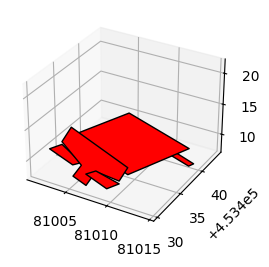

class 4, classified into class4
NL.IMBAG.Pand.0518100000204249-0_0
MULTIPOLYGON Z (((81615.47837499999 454403.01975000004 10.340501464843749, 81623.176375 454408.72075000004 10.36150146484375, 81620.51937499999 454411.94875000004 10.408501464843749, 81616.331375 454408.47575000004 10.39350146484375, 81614.267375 454408.76675 10.40650146484375, 81612.135375 454407.09075000003 10.39950146484375, 81615.47837499999 454403.01975000004 10.340501464843749)), ((81620.51937499999 454411.94875000004 9.84650146484375, 81619.654375 454412.99875 9.895501464843749, 81614.267375 454408.76675 9.879501464843749, 81616.331375 454408.47575000004 9.82850146484375, 81620.51937499999 454411.94875000004 9.84650146484375)), ((81623.176375 454408.72075000004 9.731501464843749, 81615.47837499999 454403.01975000004 10.212501464843749, 81616.919375 454401.26475000003 5.96050146484375, 81624.46337499999 454407.15775 5.94150146484375, 81623.176375 454408.72075000004 9.731501464843749)))
3


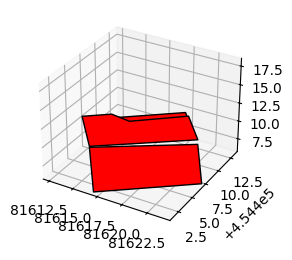

class 4, classified into class7
NL.IMBAG.Pand.0599100000017357-0_1
MULTIPOLYGON Z (((91301.4285625 436665.822 12.438503601074213, 91299.89156250001 436672.54699999996 12.430503601074214, 91299.6785625 436673.47799999994 12.429503601074213, 91297.0005625 436671.10799999995 10.630503601074214, 91299.1825625 436660.213 10.470503601074213, 91299.48656250001 436660.23699999996 10.643503601074212, 91299.8445625 436660.26499999996 10.847503601074212, 91302.3495625 436664.859 12.831503601074214, 91301.9935625 436665.23199999996 12.679503601074213, 91301.4285625 436665.822 12.438503601074213)), ((91306.00956250001 436661.42899999995 10.479503601074214, 91304.9965625 436662.09199999995 10.957503601074212, 91303.43056250001 436663.73 12.024503601074212, 91302.3495625 436664.859 12.760503601074213, 91299.8445625 436660.26499999996 10.614503601074212, 91299.48656250001 436660.23699999996 10.643503601074212, 91299.1825625 436660.213 10.668503601074214, 91299.3415625 436659.41799999995 10.22350360107

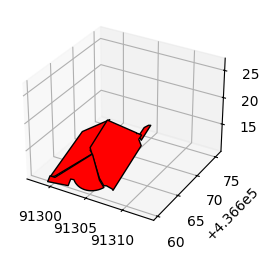

class 5, classified into class3
NL.IMBAG.Pand.0518100000203387-0_1
MULTIPOLYGON Z (((81698.225375 454624.19975 10.32350146484375, 81695.128375 454628.56175 10.31950146484375, 81694.46937499999 454628.09775 11.29850146484375, 81694.718375 454627.79575 11.26650146484375, 81694.68237499999 454626.61675 12.132501464843749, 81694.61437499999 454624.35175000003 13.79650146484375, 81697.611375 454624.12775000004 10.983501464843748, 81698.225375 454624.19975 10.32350146484375)), ((81690.119375 454620.86475 14.23550146484375, 81685.960375 454621.91275 10.64250146484375, 81685.327375 454621.46475000004 9.64450146484375, 81685.38637499999 454621.24475 9.54350146484375, 81686.343375 454621.32275 10.606501464843749, 81687.10737499999 454620.22675000003 10.59450146484375, 81687.195375 454618.98175000004 9.76150146484375, 81687.786375 454619.25375000003 10.584501464843749, 81689.05337499999 454617.43775000004 10.565501464843749, 81689.471375 454618.78275 12.00550146484375, 81690.119375 454620.86475 1

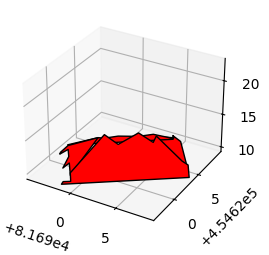

class 5, classified into class5
NL.IMBAG.Pand.0518100000206589-0_0
MULTIPOLYGON Z (((81763.83337499999 454362.80675 10.53850146484375, 81762.676375 454363.75975 11.50250146484375, 81761.294375 454362.17475 11.14450146484375, 81761.31037499999 454361.06175 10.520501464843749, 81763.83337499999 454362.80675 10.53850146484375)), ((81762.676375 454363.75975 11.60950146484375, 81762.48837499999 454363.91575000004 11.65950146484375, 81761.27637499999 454363.40975 11.83650146484375, 81761.282375 454363.00375000003 11.795501464843749, 81761.294375 454362.17475 11.71250146484375, 81762.676375 454363.75975 11.60950146484375)), ((81756.339375 454367.02075 10.730501464843748, 81756.840375 454367.49875 10.600501464843749, 81756.95937499999 454367.61175000004 10.57050146484375, 81758.264375 454367.39375 11.576501464843748, 81758.505375 454367.19475 11.908501464843749, 81759.267375 454366.56775 12.957501464843748, 81760.14137499999 454370.76975000004 9.62850146484375, 81759.821375 454371.23075 9.0065

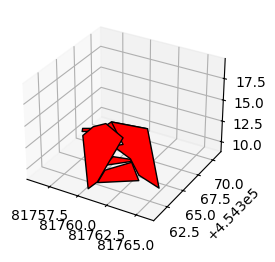

class 5, classified into class7
NL.IMBAG.Pand.0518100000206583-0_0
MULTIPOLYGON Z (((82299.571375 454093.71175 9.20850146484375, 82294.43637499999 454101.47475 9.17350146484375, 82290.77737499999 454099.11375 9.161501464843749, 82295.77337499999 454091.29175000003 9.196501464843749, 82299.571375 454093.71175 9.20850146484375)), ((82300.10637499999 454092.90275 7.39950146484375, 82299.571375 454093.71175 9.20850146484375, 82295.77337499999 454091.29175000003 9.196501464843749, 82296.312375 454090.44875000004 7.32950146484375, 82300.10637499999 454092.90275 7.39950146484375)))
2


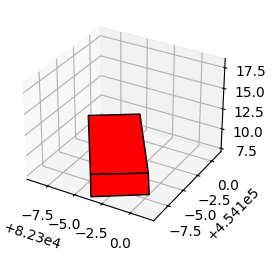

class 6, classified into class1
NL.IMBAG.Pand.0518100000205442-0_1
MULTIPOLYGON Z (((80645.84837499999 453504.66075000004 9.007501464843749, 80648.94037499999 453500.55975 9.093501464843749, 80653.147375 453503.47575000004 9.110501464843749, 80650.32637499999 453507.57975000003 9.02850146484375, 80650.27637499999 453507.65475 9.026501464843749, 80645.84837499999 453504.66075000004 9.007501464843749)), ((80648.94037499999 453500.55975 9.093501464843749, 80651.839375 453496.71575000003 3.748501464843748, 80655.877375 453499.44375000003 3.70150146484375, 80655.56037499999 453499.96475000004 4.37750146484375, 80653.147375 453503.47575000004 9.110501464843749, 80648.94037499999 453500.55975 9.093501464843749)))
2


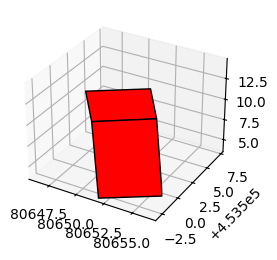

class 6, classified into class3
NL.IMBAG.Pand.0518100000204915-0_0
MULTIPOLYGON Z (((80883.927375 453778.78875 9.292501464843749, 80884.931375 453779.32175 6.53150146484375, 80882.596375 453783.60875 6.46450146484375, 80881.56537499999 453783.07075 9.28850146484375, 80883.927375 453778.78875 9.292501464843749)), ((80875.783375 453774.45475000003 6.73950146484375, 80876.79637499999 453774.99475 9.32550146484375, 80874.408375 453779.33675 9.31250146484375, 80873.419375 453778.82075 6.80050146484375, 80875.783375 453774.45475000003 6.73950146484375)), ((80881.56537499999 453783.07075 9.31350146484375, 80874.408375 453779.33675 9.31250146484375, 80876.79637499999 453774.99475 9.32550146484375, 80883.927375 453778.78875 9.32650146484375, 80881.56537499999 453783.07075 9.31350146484375)))
3


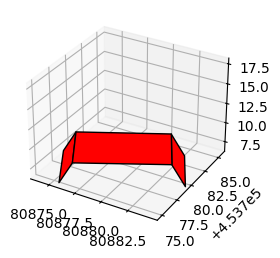

class 6, classified into class6
NL.IMBAG.Pand.0518100000206540-0_0
MULTIPOLYGON Z (((81913.08837499999 453067.45075 8.850501464843749, 81913.22437499999 453067.39875 8.792501464843749, 81914.056375 453067.08275 8.440501464843749, 81915.533375 453067.91275 7.404501464843749, 81917.816375 453063.77575000003 7.398501464843749, 81918.92937499999 453064.44075 6.60550146484375, 81916.22337499999 453069.23575 6.645501464843749, 81913.08837499999 453067.45075 8.850501464843749)), ((81914.056375 453067.08275 8.80750146484375, 81913.22437499999 453067.39875 8.792501464843749, 81913.08837499999 453067.45075 8.79050146484375, 81911.926375 453066.78875 8.77750146484375, 81911.96237499999 453066.72975 8.77850146484375, 81910.48837499999 453064.09575000004 8.77550146484375, 81912.472375 453060.58175 8.827501464843749, 81917.816375 453063.77575000003 8.88350146484375, 81915.533375 453067.91275 8.82250146484375, 81914.056375 453067.08275 8.80750146484375)), ((81908.95537499999 453064.62075 6.5755014648

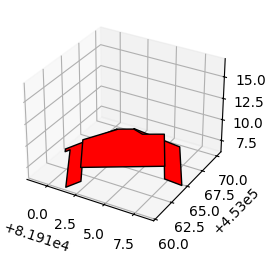

class 6, classified into class7
NL.IMBAG.Pand.0518100000204727-0_1
MULTIPOLYGON Z (((82098.873375 454839.71675 10.087501464843749, 82108.150375 454848.12175 10.087501464843749, 82107.562375 454848.78275 11.59350146484375, 82098.291375 454840.35175000003 11.55250146484375, 82098.873375 454839.71675 10.087501464843749)), ((82093.711375 454848.15575000003 8.94250146484375, 82092.737375 454847.87575 8.94450146484375, 82090.086375 454850.28675 8.93550146484375, 82089.593375 454849.83775 8.93850146484375, 82092.729375 454846.41775 8.95150146484375, 82093.711375 454848.15575000003 8.94250146484375)), ((82100.17837499999 454852.28275 11.577501464843749, 82099.48237499999 454852.98575 11.576501464843748, 82098.50437499999 454852.51975000004 11.573501464843748, 82098.25837499999 454852.19775 11.571501464843749, 82098.395375 454851.77175 11.571501464843749, 82098.888375 454850.24375 11.570501464843751, 82097.987375 454848.86675 11.565501464843749, 82096.108375 454850.06275000004 11.56150146484375

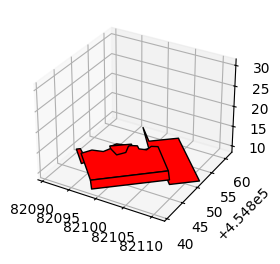

class 7, classified into class1
NL.IMBAG.Pand.0599100000159733-0_13
MULTIPOLYGON Z (((91036.6435625 436632.29799999995 7.533503601074212, 91039.00256250001 436632.78199999995 7.481503601074213, 91039.86556250001 436633.11899999995 7.458503601074213, 91039.6015625 436634.76599999995 7.425503601074212, 91035.78656250001 436633.888 7.511503601074214, 91036.0035625 436632.828 7.531503601074213, 91036.51356250001 436632.92799999996 7.520503601074214, 91036.6435625 436632.29799999995 7.533503601074212)), ((91044.5905625 436620.23799999995 7.688503601074213, 91044.5235625 436623.714 7.923503601074213, 91041.21356250001 436624.703 6.850503601074212, 91040.84656250001 436626.99199999997 6.893503601074212, 91043.4705625 436627.838 7.864503601074212, 91042.64656250001 436630.359 7.766503601074213, 91041.3185625 436639.03699999995 7.950503601074214, 91040.2575625 436640.431 7.685503601074213, 91040.9365625 436641.53199999995 8.002503601074213, 91040.8025625 436642.408 8.021503601074212, 91034.3845

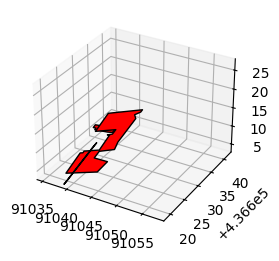

class 7, classified into class2
NL.IMBAG.Pand.0518100000207079-0_3
MULTIPOLYGON Z (((80612.44037499999 453167.87375 12.61950146484375, 80608.200375 453170.98375 12.794501464843748, 80603.30337499999 453174.57475 12.99650146484375, 80601.305375 453171.64675 9.44750146484375, 80605.15137499999 453168.73475 9.212501464843749, 80609.783375 453165.22675000003 8.930501464843749, 80610.441375 453164.96875 9.08850146484375, 80612.44037499999 453167.87375 12.61950146484375)), ((80601.305375 453171.64675 9.23450146484375, 80600.063375 453169.82775 8.97950146484375, 80609.452375 453163.53275 9.004501464843749, 80610.441375 453164.96875 9.20550146484375, 80609.783375 453165.22675000003 9.186501464843749, 80605.15137499999 453168.73475 9.212501464843749, 80601.305375 453171.64675 9.23450146484375)), ((80603.30337499999 453174.57475 12.596501464843751, 80608.200375 453170.98375 12.794501464843748, 80612.44037499999 453167.87375 12.96550146484375, 80615.62137499999 453172.49575 7.25850146484375, 8060

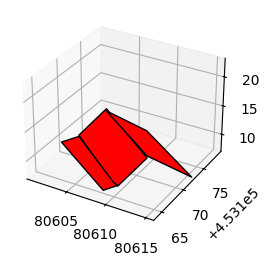

class 7, classified into class3
NL.IMBAG.Pand.0518100000205730-0_0
MULTIPOLYGON Z (((82041.768375 453173.22675000003 8.885501464843749, 82043.24737499999 453173.69575 8.97950146484375, 82041.86437499999 453176.14475000004 8.96350146484375, 82040.58837499999 453175.72775 8.88150146484375, 82041.768375 453173.22675000003 8.885501464843749)), ((82039.926375 453170.38075 11.36050146484375, 82034.83737499999 453178.98875 11.064501464843751, 82032.78037499999 453177.87475 11.23450146484375, 82035.83337499999 453173.05475 11.390501464843748, 82036.10737499999 453172.85775 11.38950146484375, 82037.547375 453169.09575000004 11.55750146484375, 82039.926375 453170.38075 11.36050146484375)), ((82035.952375 453168.23375 8.747501464843749, 82037.547375 453169.09575000004 9.58850146484375, 82036.10737499999 453172.85775 9.86450146484375, 82035.83337499999 453173.05475 9.79850146484375, 82032.78037499999 453177.87475 9.66350146484375, 82031.041375 453176.93275000004 8.74650146484375, 82035.952375 4531

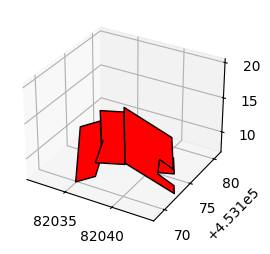

class 7, classified into class4
NL.IMBAG.Pand.0518100000205977-0_1
MULTIPOLYGON Z (((81454.926375 453695.71675 8.84650146484375, 81453.04937499999 453699.03275 8.80150146484375, 81452.06937499999 453698.35275 8.795501464843749, 81453.979375 453695.18775000004 8.83950146484375, 81454.926375 453695.71675 8.84650146484375)), ((81458.139375 453711.31675 7.551501464843749, 81457.476375 453713.39775 6.68450146484375, 81457.812375 453713.74775000004 5.722501464843749, 81457.540375 453714.14775 5.81950146484375, 81456.200375 453713.40075000003 9.004501464843749, 81455.166375 453715.23475 9.05950146484375, 81453.96637499999 453714.57875 11.899501464843748, 81454.92137499999 453713.18075 11.55450146484375, 81456.87537499999 453710.31875000003 10.84850146484375, 81457.707375 453710.97475 8.67850146484375, 81458.139375 453711.31675 7.551501464843749)), ((81453.04937499999 453699.03275 12.076501464843748, 81448.373375 453707.29575 11.84050146484375, 81446.75137499999 453707.16475 8.86250146484375, 

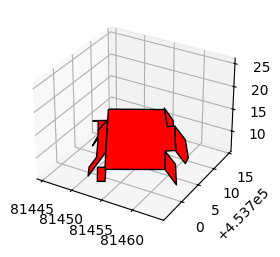

class 7, classified into class6
NL.IMBAG.Pand.0518100000203308-0_0
MULTIPOLYGON Z (((82319.85637499999 453134.26075 12.123501464843748, 82315.229375 453131.65675 7.33250146484375, 82320.130375 453122.92175000004 7.299501464843749, 82324.759375 453125.51975000004 12.09050146484375, 82319.85637499999 453134.26075 12.123501464843748)), ((82324.40637499999 453135.94575 9.23050146484375, 82322.642375 453135.57675 9.30050146484375, 82322.408375 453135.52775 9.31050146484375, 82327.377375 453126.98775000003 9.24650146484375, 82328.895375 453127.83975000004 9.17950146484375, 82324.40637499999 453135.94575 9.23050146484375)), ((82330.00737499999 453128.17375 6.695501464843749, 82325.05037499999 453137.18275000004 6.651501464843749, 82319.85637499999 453134.26075 12.123501464843748, 82324.759375 453125.51975000004 12.09050146484375, 82327.377375 453126.98775000003 9.33550146484375, 82322.408375 453135.52775 9.50950146484375, 82322.642375 453135.57675 9.30050146484375, 82324.40637499999 453135.94

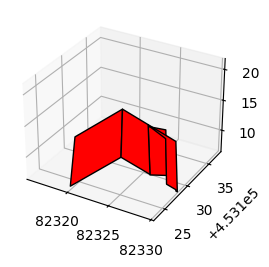

class 7, classified into class7


In [135]:
import geopandas as gpd
import matplotlib.pyplot as plt
from copy import deepcopy
import matplotlib.colors as colors
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
import tkinter as tk
from tkinter.simpledialog import askinteger
import os
from copy import deepcopy
import threading
from tkinter import simpledialog
import random
from shapely.geometry import MultiPolygon
from shapely.ops import unary_union
from pathlib import Path
from copy import deepcopy
# from cjio import cityjson
from shapely.geometry import Polygon

# Load your 3D multipolygon data using geopandas
gdf = gpd.read_file('rotterdam_roof.geojson')
gdf2 = gpd.read_file('denhaag_roof.geojson')
gdf = pd.concat([gdf,gdf2])
for i in range(1,8):
    for t in range(1,8):
        try:
            ids = matrix_labels[i][t][0]
            print(ids)
        except:
            continue
        polygon,maxx,minx,maxy,miny,maxz,minz = return_polygons(gdf[gdf["Id"]==ids]["geometry"])
        print(len(polygon))
        plot(polygon)
        print(f"class {i}, classified into class{t}")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
clf = HistGradientBoostingClassifier()
k = 5  # Number of folds for cross-validation
kf = KFold(n_splits=k)
y=y.ravel()

accuracies = cross_val_score(clf, np.vstack([X_train,X_test]), np.hstack([y_train,y_test]), cv=kf, scoring='accuracy')
print(accuracies)
# Compute the mean accuracy and round it to 5 decimal places
mean_accuracy = np.mean(accuracies)
mean_accuracy = round(mean_accuracy, 5)
print(f"Mean Accuracy (5 decimal places): {mean_accuracy}")

# model explainer
## to be continued

SHAP value
***
$\phi_i(f) = \sum_{S \subseteq N \setminus \{i\}} \frac{|S|!(|N|-|S|-1)!}{|N|!} [f(S \cup \{i\}) - f(S)]$

In [88]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [60]:
import shap
shap.initjs()

In [61]:
clf = HistGradientBoostingClassifier()
clf.fit(X_train, y_train)
explainer = shap.KernelExplainer(clf.predict_proba,X_train[:128])

shap_values = explainer.shap_values(X_test[:32])


Using 128 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/32 [00:00<?, ?it/s]

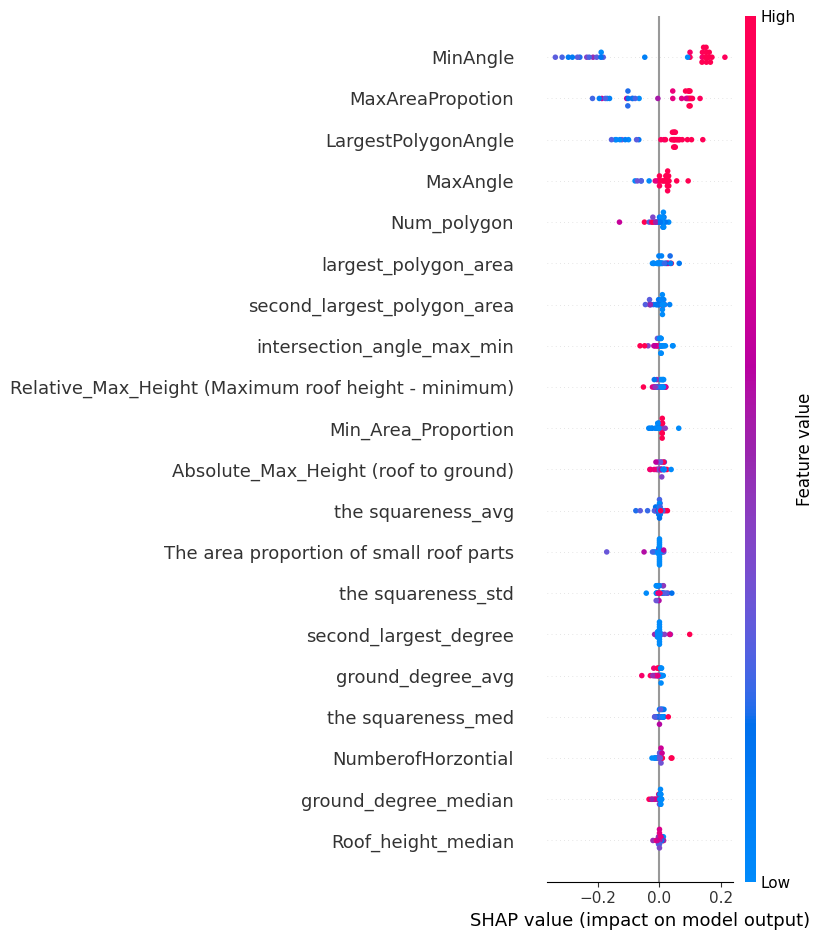

In [62]:
shap.summary_plot(shap_values[0], X_test[:32], feature_names=filter_columns)

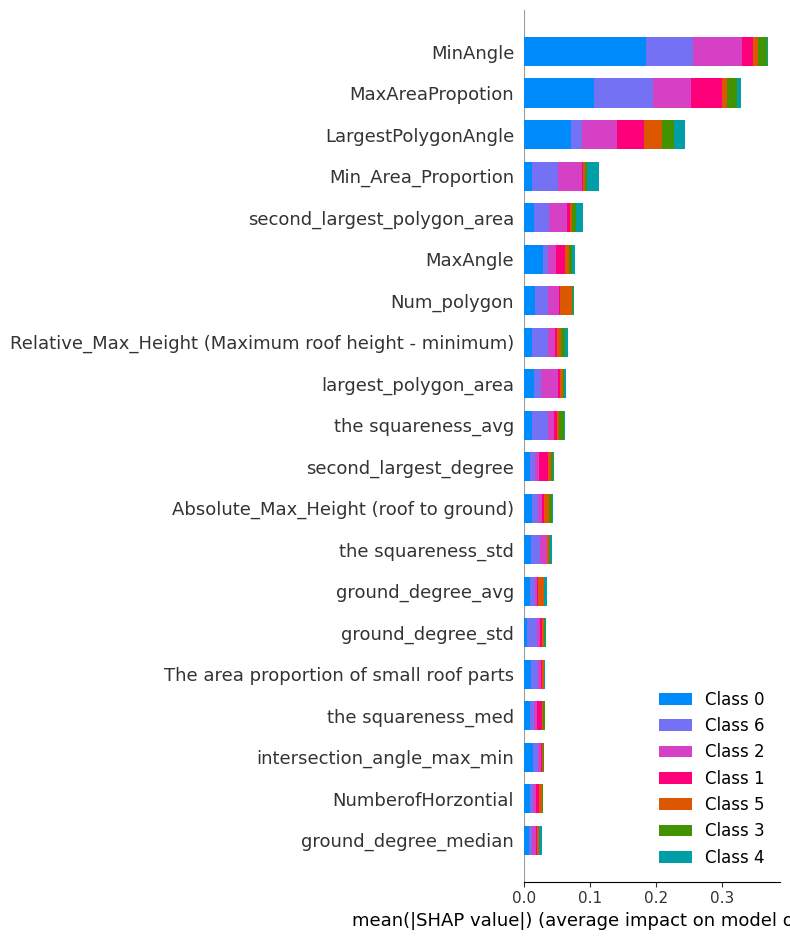

In [63]:
# shap.summary_plot(shap_values, data[columns], plot_type="bar")
shap.summary_plot(shap_values, plot_type="bar",feature_names =filter_columns)

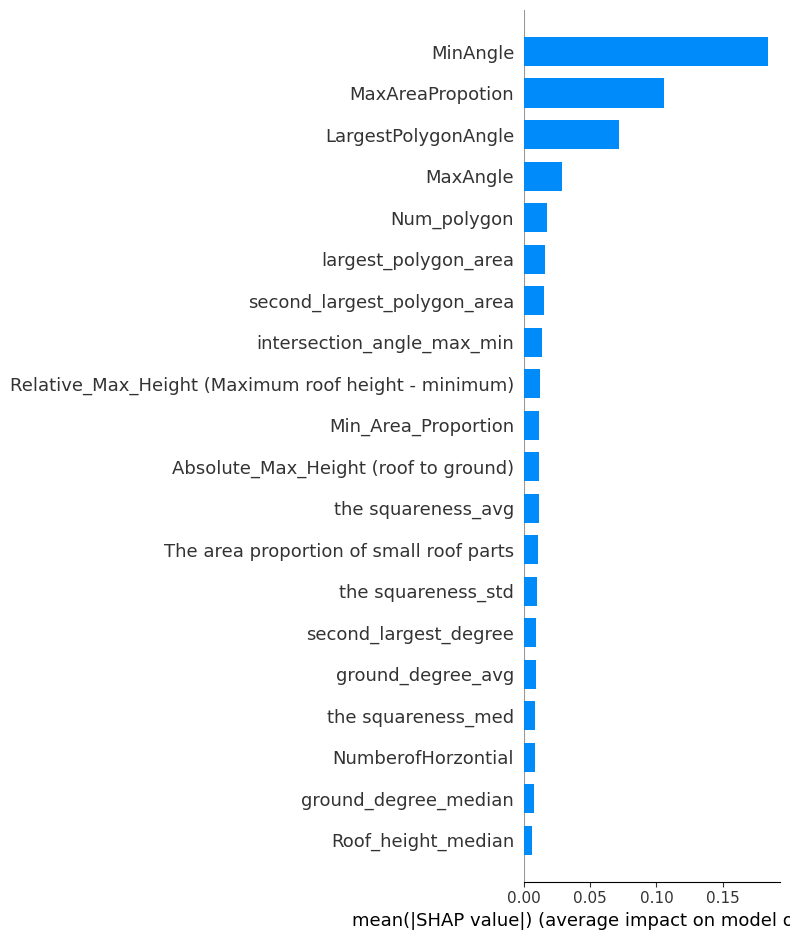

In [64]:
shap.summary_plot(shap_values[0], plot_type="bar",feature_names = filter_columns)

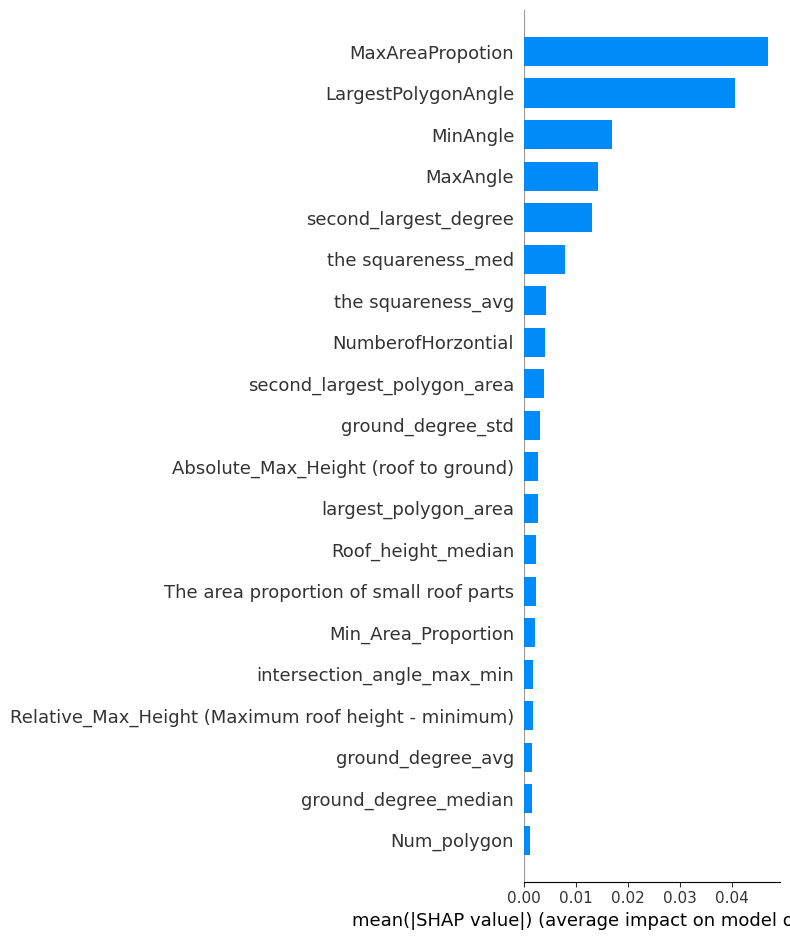

In [65]:
shap.summary_plot(shap_values[1], plot_type="bar",feature_names = filter_columns)

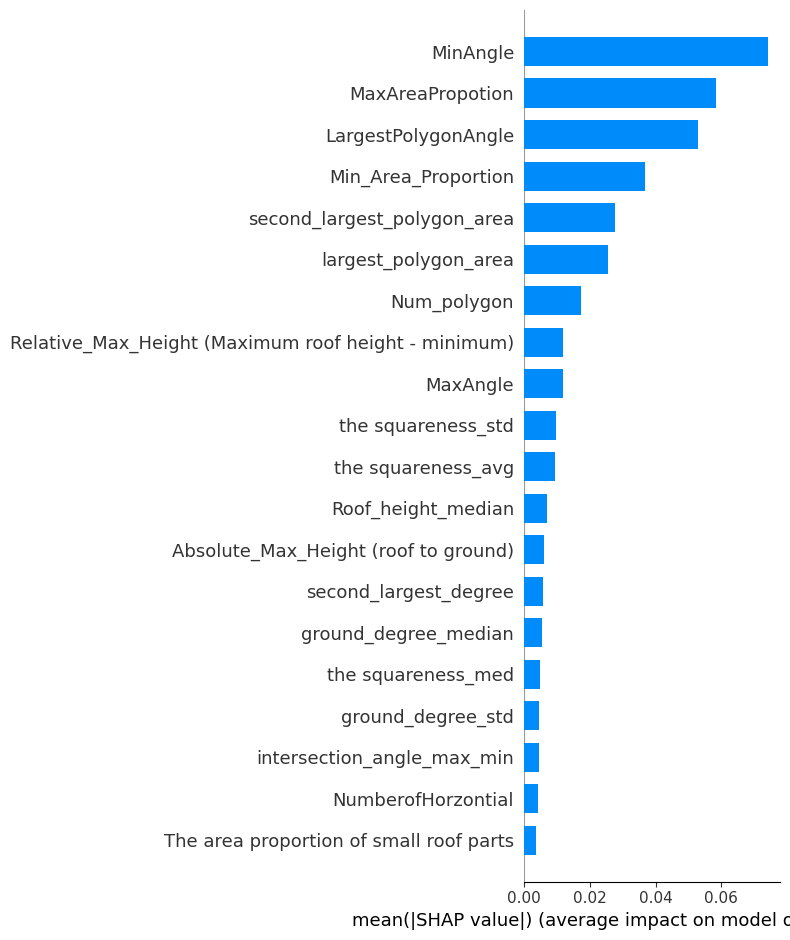

In [66]:
shap.summary_plot(shap_values[2], plot_type="bar",feature_names = filter_columns)

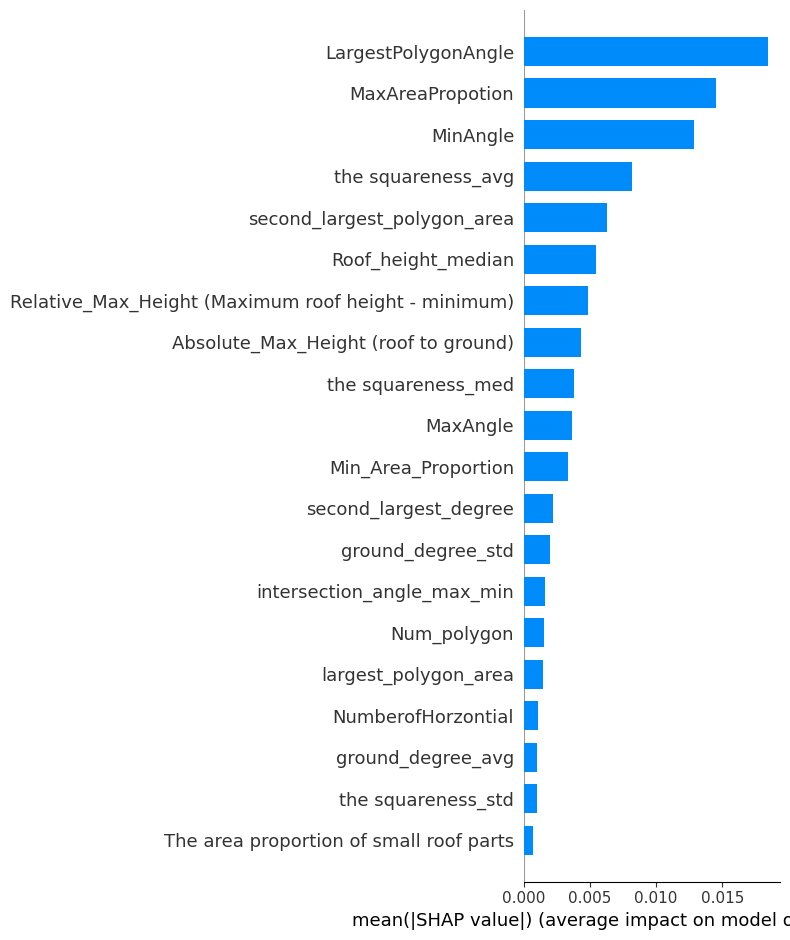

In [67]:
shap.summary_plot(shap_values[3], plot_type="bar",feature_names = filter_columns)

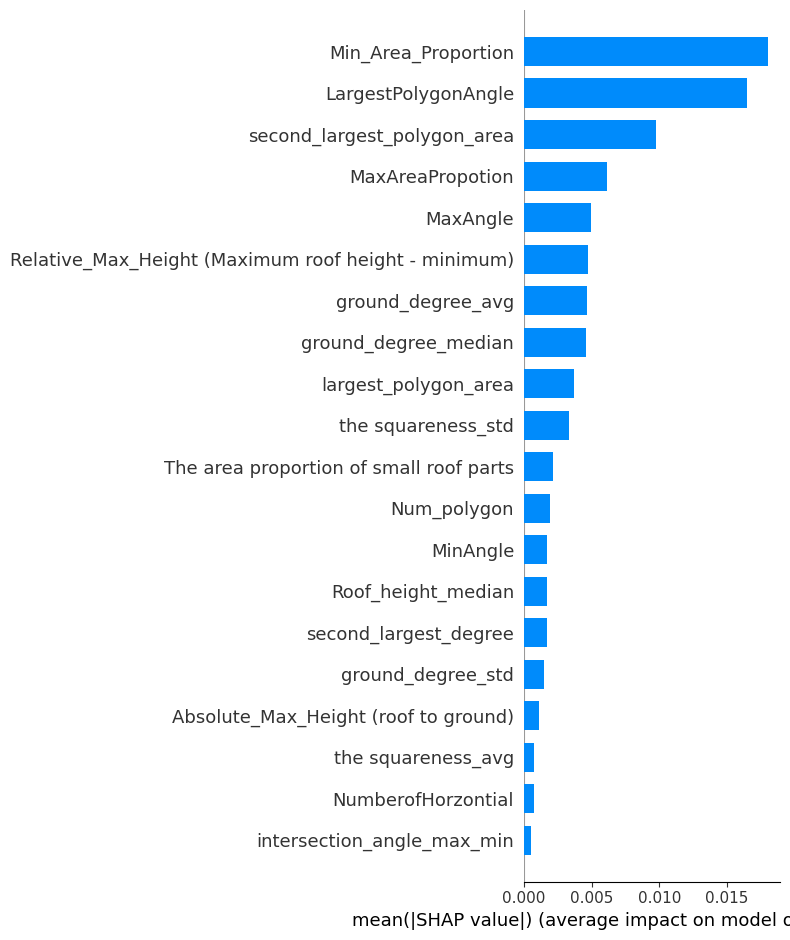

In [68]:
shap.summary_plot(shap_values[4], plot_type="bar",feature_names = filter_columns)

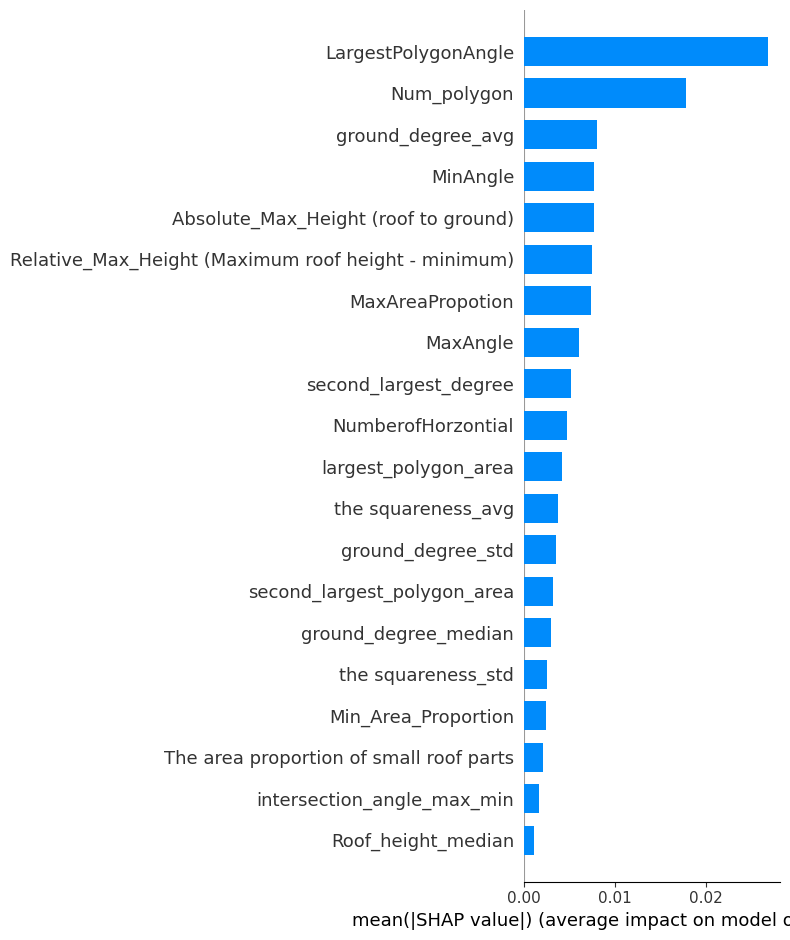

In [69]:
shap.summary_plot(shap_values[5], plot_type="bar",feature_names = filter_columns)

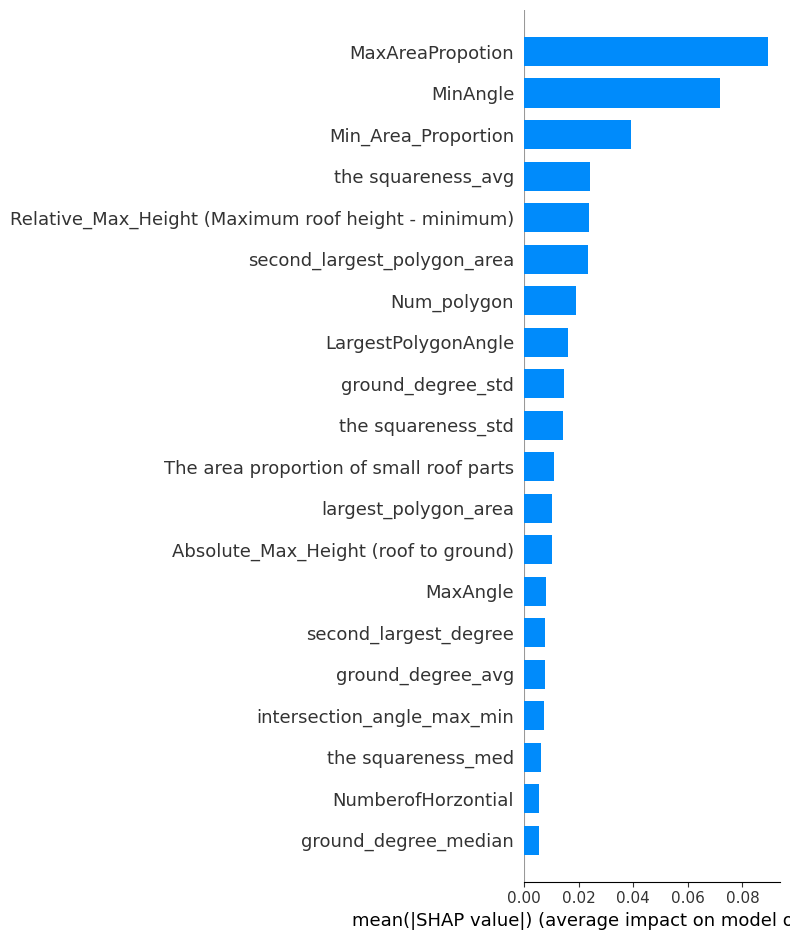

In [70]:
shap.summary_plot(shap_values[6], plot_type="bar",feature_names = filter_columns)

In [136]:
import geopandas as gpd
import requests
from io import BytesIO
from PIL import Image
vector_file = "Denhaag_roof.geojson"
# 1. 读取3D矢量文件

gdf = gpd.read_file(vector_file)

In [137]:
gdf.head()

,Id,Area,MaxAngle,MinAngle,Num_polygon,MaxAreaPropotion,LargestPolygonAngle,geometry
0,NL.IMBAG.Pand.0518100000203155-0_0,166.190179,179.63,179.63,1.0,100.000000,179.63,"MULTIPOLYGON Z (((81129.318 453482.054 10.698,..."
1,NL.IMBAG.Pand.0518100000203155-0_1,11.861052,178.81,178.81,1.0,100.000000,178.81,"MULTIPOLYGON Z (((81132.365 453487.284 7.637, ..."
2,NL.IMBAG.Pand.0518100000203166-0_0,122.576941,179.55,114.81,5.0,66.822179,179.55,"MULTIPOLYGON Z (((81004.440 453443.391 7.276, ..."
3,NL.IMBAG.Pand.0518100000203170-0_0,83.295178,3.12,3.12,1.0,100.000000,3.12,"MULTIPOLYGON Z (((80937.697 453441.628 10.393,..."
4,NL.IMBAG.Pand.0518100000203173-0_0,122.470234,179.52,52.98,5.0,66.088778,179.52,"MULTIPOLYGON Z (((80964.419 453447.251 9.509, ..."


In [139]:
data = data[["Id","labels"]]

In [144]:
data

,Id,labels
0,NL.IMBAG.Pand.0518100000203155-0_0,1
1,NL.IMBAG.Pand.0518100000203155-0_0,1
2,NL.IMBAG.Pand.0518100000203155-0_0,1
3,NL.IMBAG.Pand.0518100000203155-0_1,1
4,NL.IMBAG.Pand.0518100000203155-0_1,1
...,...,...
2169,NL.IMBAG.Pand.0599100000623628-0_0,1
2170,NL.IMBAG.Pand.0599100000623636-0_0,7
2171,NL.IMBAG.Pand.0599100000623663-0_0,1
2172,NL.IMBAG.Pand.0599100000625057-0_1,3


In [140]:
gdf = pd.merge(gdf,df,left_on="Id",right_on="Id")

In [141]:
gdf.head()

,Id,Area_x,MaxAngle_x,MinAngle_x,Num_polygon_x,MaxAreaPropotion_x,LargestPolygonAngle_x,geometry_x,Area_y,MaxAngle_y,...,Absolute_Max_Height (roof to ground),Relative_Max_Height (Maximum roof height - minimum),Roof_height_standard_deviation,Roof_height_median,The number of small roof parts,The area proportion of small roof parts,the squareness_avg,the squareness_med,the squareness_std,geometry_y
0,NL.IMBAG.Pand.0518100000203155-0_0,166.190179,179.63,179.63,1.0,100.000000,179.63,"MULTIPOLYGON Z (((81129.318 453482.054 10.698,...",166.190179,179.63,...,10.765946,0.000000,0.000000,10.765946,0,0.000000,1.469135,1.469135,0.000000,MULTIPOLYGON Z (((81129.31837499999 453482.053...
1,NL.IMBAG.Pand.0518100000203155-0_1,11.861052,178.81,178.81,1.0,100.000000,178.81,"MULTIPOLYGON Z (((81132.365 453487.284 7.637, ...",11.861052,178.81,...,7.655901,0.000000,0.000000,7.655901,0,0.000000,1.422253,1.422253,0.000000,MULTIPOLYGON Z (((81132.365375 453487.28375 7....
2,NL.IMBAG.Pand.0518100000203166-0_0,122.576941,179.55,114.81,5.0,66.822179,179.55,"MULTIPOLYGON Z (((81004.440 453443.391 7.276, ...",122.576941,179.55,...,10.252501,2.962667,0.999558,9.492956,1,0.040425,1.661516,1.619207,0.392296,MULTIPOLYGON Z (((81004.44037499999 453443.390...
3,NL.IMBAG.Pand.0518100000203170-0_0,83.295178,3.12,3.12,1.0,100.000000,3.12,"MULTIPOLYGON Z (((80937.697 453441.628 10.393,...",83.295178,3.12,...,10.445368,0.000000,0.000000,10.445368,0,0.000000,1.544721,1.544721,0.000000,MULTIPOLYGON Z (((80937.69737499999 453441.627...
4,NL.IMBAG.Pand.0518100000203173-0_0,122.470234,179.52,52.98,5.0,66.088778,179.52,"MULTIPOLYGON Z (((80964.419 453447.251 9.509, ...",122.470234,179.52,...,10.063701,2.735283,0.957516,9.467168,1,0.037760,1.448154,1.611655,0.313833,MULTIPOLYGON Z (((80964.419375 453447.25075 9....


In [142]:
groups = gdf[:3000].groupby("Id")

In [143]:
from tqdm import tqdm
import time

url = "https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0?request=GetMap&service=wms"
params = {
        "SERVICE": "WMS",
        "VERSION": "1.3.0",
        "REQUEST": "GetMap",
        "LAYERS": "Actueel_orthoHR",
        "STYLES": "",
        "FORMAT": "image/jpeg",
        "CRS": "epsg:28992",
        "BBOX": "",#",".join(map(str, bbox)),
        "WIDTH": 56,  # 图像宽度
        "HEIGHT": 56,  # 图像高度
    }
for group in tqdm(groups):
    index = group[0]
    label = group[1]["labels"]
    #print(group[1]["geometry"])
    total_bbox = group[1].total_bounds
    total_bbox[0]=total_bbox[0]-5
    total_bbox[1]=total_bbox[1]-5
    total_bbox[2]=total_bbox[2]+5
    total_bbox[3]=total_bbox[3]+5
    params["BBOX"]=",".join(map(str, total_bbox))
    #print(total_bbox)
    minx,miny,maxx,maxy = total_bbox
    width = (maxx-minx)/0.08
    height = (maxy-miny)/0.08
    width = int(width)
    height = int(height)
    params["WIDTH"]=width
    params["HEIGHT"]=height
    response = requests.get(url, params=params,stream=True)
    
    if response.status_code == 200:
        # 5. 保存航拍图像
        
        
        image = Image.open(BytesIO(response.content))


        
        image.save(f"images/image_{index}_{label}.jpg")
        
        
    else:
        print(f"Failed to download image for feature {index}")

    # 6. 完成
    #print("Image downloading completed.")
    
    

  0%|                                                                                         | 0/3000 [00:00<?, ?it/s]


KeyError: 'labels'

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
import numpy as np
import os
from tqdm import tqdm
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # 遍历数据目录，提取图像路径和标签
        
        for filename in data_dir:
            if filename.endswith(".jpg"):
                

                label = int(filename.split(" ")[4][0])
                
                image_path = filename
                
                if isinstance(image_path,str):
                    self.image_paths.append(image_path)
                    self.labels.append(label-1)
        print(len(self.image_paths))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        image = Image.open(image_path)

        if self.transform:
            image = self.transform(image)

        return image, label

# 数据预处理
data_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 加载数据集
data_dir = 'images'

# 分割数据集为训练集、验证集和测试集
image_paths, labels = [], []

for filename in os.listdir(data_dir):
    if filename.endswith(".jpg"):
        
        
        label = int(filename.split(" ")[4][0])
        image_path = os.path.join(data_dir, filename)
        if isinstance(image_path,str):
            image_paths.append(image_path)
            labels.append(label-1)
print(np.unique(np.array(labels)))
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

train_dataset = CustomDataset(X_train, transform=data_transform)
valid_dataset = CustomDataset(X_valid, transform=data_transform)
test_dataset = CustomDataset(X_test, transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)




[0 1 2 3 4 5]
1800
600
600


In [46]:
model = models.resnet18(pretrained=True)

/Users/asdfasd/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/asdfasd/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [49]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
# 创建ResNet模型
model = models.resnet18(pretrained=True)
num_classes = len(set(labels))
model.fc = nn.Linear(model.fc.in_features, num_classes)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# freeze first layer
# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# 评估模型



/Users/asdfasd/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/asdfasd/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:04<00:00, 11.5MB/s]
 42%|██████████████████                         | 24/57 [01:11<01:38,  2.97s/it]

KeyboardInterrupt



In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in valid_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Validation Accuracy: {accuracy:.2f}%')



Validation Accuracy: 55.17%


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 57.17%
